# Starter Notebook: Economic Well-Being Prediction Challenge

Welcome! This starter notebook is designed to get you started on this challenge, where you will be attempting to predict a measure of wealth for different locations across Africa. We will take a look at the data, create a model and then use that to make our first submission. After that we will briefly look at some ways to improve. Let's get started.

# Loading the Data

We're using the pandas library to load the data into dataframes - a tabular data structure that is perfect for this kind of work. Each of the three CSV files from Zindi is loaded into a dataframe and we take a look at the shape of the data (number of rows and columns) as well as a preview of the first 5 rows to get a feel for what we're working with.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('C:/Users/~`CRASHOVERRIDE/Downloads/UmojaBeginnerPractice/Train.csv')
print(train.shape)
train.head()

(21454, 19)


ID     country  year urban_or_rural  ghsl_water_surface  \
0  ID_AAIethGy    Ethiopia  2016              R                 0.0   
1  ID_AAYiaCeL    Ethiopia  2005              R                 0.0   
2  ID_AAdurmKj  Mozambique  2009              R                 0.0   
3  ID_AAgNHles      Malawi  2015              R                 0.0   
4  ID_AAishfND      Guinea  2012              U                 0.0   

   ghsl_built_pre_1975  ghsl_built_1975_to_1990  ghsl_built_1990_to_2000  \
0             0.000000                 0.000000                 0.000055   
1             0.000000                 0.000110                 0.000000   
2             0.000000                 0.000000                 0.000000   
3             0.000141                 0.000181                 0.000254   
4             0.011649                 0.017560                 0.017383   

   ghsl_built_2000_to_2014  ghsl_not_built_up  ghsl_pop_density  \
0                 0.000536           0.999408         12.146134   
1                 0.000018           0.999872        113.806716   
2                 0.000000           1.000000          0.000000   
3                 0.000228           0.999195          5.213320   
4                 0.099875           0.853533         31.734661   

   landcover_crops_fraction  landcover_urban_fraction  \
0                 25.489659                  0.879484   
1                 64.136053                  0.601427   
2                  4.400096                  0.131900   
3                 25.379371                  2.017136   
4                  5.081620                 22.815984   

   landcover_water_permanent_10km_fraction  \
0                                 0.000000   
1                                 0.000000   
2                                 0.000000   
3                                11.293841   
4                                 0.005047   

   landcover_water_seasonal_10km_fraction  nighttime_lights  dist_to_capital  \
0                                0.000000          0.000000       278.788451   
1                                0.005427          0.000000       200.986978   
2                                0.003078          0.000000       642.594208   
3                                0.131035          0.000000       365.349451   
4                                0.130475          1.461894       222.867189   

   dist_to_shoreline    Target  
0         769.338378  0.132783  
1         337.135243  0.004898  
2         169.913773  0.097320  
3         613.591610  0.304107  
4         192.926363  0.605328

In train, we have a set of inputs (like 'urban_or_rural' or 'ghsl_water_surface') and our desired output variable, 'Target'. There are 21454 rows - lots of juicy data!

In [3]:
test = pd.read_csv('C:/Users/~`CRASHOVERRIDE/Downloads/UmojaBeginnerPractice/Test.csv')
print(test.shape)
test.head()

(7194, 18)


ID                       country  year urban_or_rural  \
0  ID_AAcismbB  Democratic Republic of Congo  2007              R   
1  ID_AAeBMsji  Democratic Republic of Congo  2007              U   
2  ID_AAjFMjzy                        Uganda  2011              U   
3  ID_AAmMOEEC                  Burkina Faso  2010              U   
4  ID_ABguzDxp                        Zambia  2007              R   

   ghsl_water_surface  ghsl_built_pre_1975  ghsl_built_1975_to_1990  \
0            0.000000             0.000000                 0.000000   
1            0.000000             0.004239                 0.000238   
2            0.007359             0.525682                 0.132795   
3            0.000000             0.000089                 0.000036   
4            0.000000             0.000138                 0.000623   

   ghsl_built_1990_to_2000  ghsl_built_2000_to_2014  ghsl_not_built_up  \
0                 0.000523                 0.000131           0.999347   
1                 0.001227                 0.002860           0.991437   
2                 0.095416                 0.042375           0.196373   
3                 0.001519                 0.001358           0.996997   
4                 0.000615                 0.002961           0.995663   

   ghsl_pop_density  landcover_crops_fraction  landcover_urban_fraction  \
0          0.660758                  0.990942                  0.132264   
1          6.441547                  5.461365                  0.452400   
2        587.516458                  2.881811                 87.387991   
3         35.141762                 33.878927                  4.166437   
4          3.442449                 33.491994                  3.437129   

   landcover_water_permanent_10km_fraction  \
0                                 0.069055   
1                                 0.000000   
2                                 3.248483   
3                                 0.000000   
4                                 0.133563   

   landcover_water_seasonal_10km_fraction  nighttime_lights  dist_to_capital  \
0                                0.032627          0.000000      1249.294720   
1                                0.000000          0.000000       821.019579   
2                                3.950374         60.070041         3.620455   
3                                0.130727          1.333999       109.493969   
4                                0.128997          0.502203       133.643319   

   dist_to_shoreline  
0        1364.592100  
1        1046.028681  
2         906.057334  
3         775.139189  
4         835.591501

Test looks just like train but without the 'Target' column and with fewer rows.

In [4]:
ss = pd.read_csv('C:/Users/~`CRASHOVERRIDE/Downloads/UmojaBeginnerPractice/SampleSubmission.csv')
print(ss.shape)
ss.head()

(7194, 2)


ID  Target
0  ID_AAcismbB       0
1  ID_AAeBMsji       0
2  ID_AAjFMjzy       0
3  ID_AAmMOEEC       0
4  ID_ABguzDxp       0

The sample submission is just the ID column from test with a 'Target' column where we will put out predictions.

Now that we have the data loaded, we can start exploring.

# EDA

We will explore some trends in the data and look for any anomalies such as missing data. A few examples are done here but you can explore much further yourself and get to know the data better.

First up: let's see how an input like 'nighttime lights' relates to the target column:

In [5]:
# Plotting the relationship between an input column and the target
train.plot(x='nighttime_lights', y='Target', kind='scatter', alpha=0.2)

In [6]:
# Exercise: Try this with different inputs. Any unexpected trends?

As you might have guessed, places that emit more light tend to be wealthier, but there is a lot of variation.

We can also look at categorical columns like 'country' or 'urban_vs_rural' and see the distribution of the target for each group:

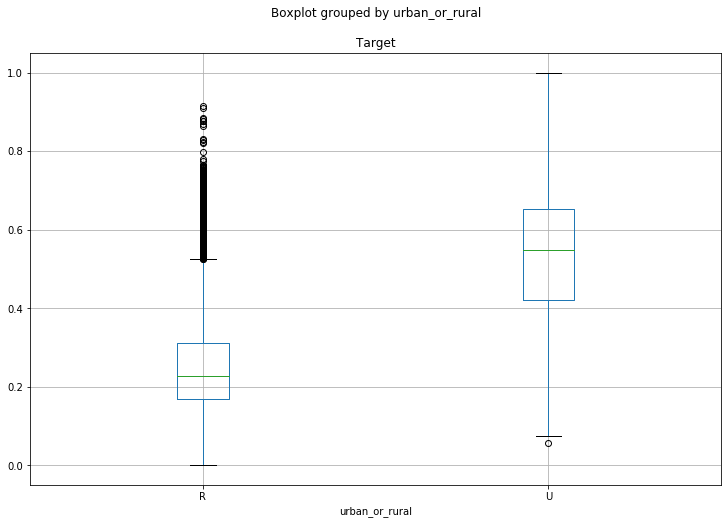

In [7]:
# Looking at the wealth distribution for urban vs rural
train.boxplot(by='urban_or_rural', column='Target', figsize=(12, 8))

In [8]:
# Exercise: which is the country with the higest average wealth_index according to this dataset?

Again, not unexpected. Rural areas tend to be less wealthy than urban areas.

Now the scary question: do we have missing data to deal with?

In [9]:
train.isna().sum() # Hooray - no missing data!

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
Target                                     0
dtype: int64

See what other trends you can uncover - we have only scratched the surface here. 

In [10]:
# Exercise: explore the data further

# Modelling

We've had a look at our data and it looks good! Let's see if we can create a model to predict the Target given some of our inputs. To start with we will use only the numeric columns, so that we can fit a model right away. 

In [11]:
in_cols = list(train.columns[4:-1])
print('Input columns:', in_cols)

Input columns: ['ghsl_water_surface', 'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990', 'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014', 'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction', 'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction', 'landcover_water_seasonal_10km_fraction', 'nighttime_lights', 'dist_to_capital', 'dist_to_shoreline']


To evaluate our model, we need to keep some data separate. We will split out data into X (inputs) and y (output) and then further split into train and test sets with the following code:

In [12]:
from sklearn.model_selection import train_test_split

X, y = train[in_cols], train['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58) # Random state keeps the split consistent
print(X_train.shape, X_test.shape)

(17163, 14) (4291, 14)


We now have a nice test set of ~4200 rows. We will train our model and then use this test set to calculate our score.

In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor() # Create the model
model.fit(X_train, y_train) # Train it (this syntax looks the same for all sklearn models)
model.score(X_test, y_test) # Show a score

D:\CRASHOVERRIDE\SOFTWARES\INSTALLED SOFT\CONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6786204174703367

What is the score above? The default for regression models is the R^2 score, a measure of how well the mode does at predicting the target. 0.69 is pretty good - let's plot the predictions vs the actual values and see how close it looks to a straight line:

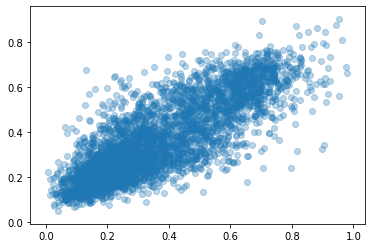

In [14]:
from matplotlib import pyplot as plt
plt.scatter(y_test, model.predict(X_test), alpha=0.3)

This looks great - most predictions are nice and close to the true value! But we still don't have a way to link this to the leaderboard score on Zindi. Let's remedy that by calculating the Root Mean Squared Error, the same metric Zindi uses. 

In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np

# The `squared=False` bit tells this function to return the ROOT mean squared error
mse = mean_squared_error(y_test, model.predict(X_test))
print("Root Mean Square Error:", np.sqrt(mse))

Root Mean Square Error: 0.11170266145923577


Great stuff. Let's make a submission and then move on to looking for ways to improve.

In [16]:
# Copying our predictions into the submission dataframe - make sure the rows are in the same order!
ss['Target'] = model.predict(test[in_cols]) 
ss.head()

ID    Target
0  ID_AAcismbB  0.205589
1  ID_AAeBMsji  0.151068
2  ID_AAjFMjzy  0.600977
3  ID_AAmMOEEC  0.355646
4  ID_ABguzDxp  0.232461

We now have our predictions in the right format to submit. The following line saves this to a file that you can then upload to get a score:

In [17]:
ss.to_csv('first_submission.csv', index=False)

# Getting Better

You might have noticed that your score on Zindi wasn't as good as the one you got above. This is because the test set comes from different countries to the train set. When we did a random split, we ended up with our local train and test both coming from the same countries - and it's easier for a model to extrapolate within countries than it is for it to make predictions for a new location. 

So our first step might be to make a scoring function that splits the data according to country, and measures the model performance on unseen countries. Try it and share your testing methods in the discussions. And look at the following questions:
- Does your score drop when you score your model on countries it wasn't trained with?
- Does the new score more accurately match the leaderboard score?
- Are any countries particularly 'hard' to make predictions in?

In [18]:
# You code for a enw model evaluation method here

Knowing how well our model is doing is useful, but however you measure that we also need ways to improve this performance! There are a few ways to do this:

- Feed the model better data. How? Feature engineering! If we can add meaningful features the model will have more data to work with.
- Tune your models. We used the default parameters - perhaps we can tweak some hyperparameters to make our models better
- Try fancier models. Perhaps XGBoost or a neural network is better than Random Forest at this task

Let's do a little of each. First up, let's create a numeric feature that encodes the 'urban_or_rural' column as something the model can use:

In [19]:
train.head()

ID     country  year urban_or_rural  ghsl_water_surface  \
0  ID_AAIethGy    Ethiopia  2016              R                 0.0   
1  ID_AAYiaCeL    Ethiopia  2005              R                 0.0   
2  ID_AAdurmKj  Mozambique  2009              R                 0.0   
3  ID_AAgNHles      Malawi  2015              R                 0.0   
4  ID_AAishfND      Guinea  2012              U                 0.0   

   ghsl_built_pre_1975  ghsl_built_1975_to_1990  ghsl_built_1990_to_2000  \
0             0.000000                 0.000000                 0.000055   
1             0.000000                 0.000110                 0.000000   
2             0.000000                 0.000000                 0.000000   
3             0.000141                 0.000181                 0.000254   
4             0.011649                 0.017560                 0.017383   

   ghsl_built_2000_to_2014  ghsl_not_built_up  ghsl_pop_density  \
0                 0.000536           0.999408         12.146134   
1                 0.000018           0.999872        113.806716   
2                 0.000000           1.000000          0.000000   
3                 0.000228           0.999195          5.213320   
4                 0.099875           0.853533         31.734661   

   landcover_crops_fraction  landcover_urban_fraction  \
0                 25.489659                  0.879484   
1                 64.136053                  0.601427   
2                  4.400096                  0.131900   
3                 25.379371                  2.017136   
4                  5.081620                 22.815984   

   landcover_water_permanent_10km_fraction  \
0                                 0.000000   
1                                 0.000000   
2                                 0.000000   
3                                11.293841   
4                                 0.005047   

   landcover_water_seasonal_10km_fraction  nighttime_lights  dist_to_capital  \
0                                0.000000          0.000000       278.788451   
1                                0.005427          0.000000       200.986978   
2                                0.003078          0.000000       642.594208   
3                                0.131035          0.000000       365.349451   
4                                0.130475          1.461894       222.867189   

   dist_to_shoreline    Target  
0         769.338378  0.132783  
1         337.135243  0.004898  
2         169.913773  0.097320  
3         613.591610  0.304107  
4         192.926363  0.605328

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
### DATA ENCODING
le = LabelEncoder()
train['ID'] = le.fit_transform(train['ID'])
train['country'] = le.fit_transform(train['country'])
train['year'] = le.fit_transform(train['year'])
train['urban_or_rural'] = le.fit_transform(train['urban_or_rural'])


In [22]:
train.head()

ID  country  year  urban_or_rural  ghsl_water_surface  ghsl_built_pre_1975  \
0   0        3    18               0                 0.0             0.000000   
1   1        3     7               0                 0.0             0.000000   
2   2       10    11               0                 0.0             0.000000   
3   3        8    17               0                 0.0             0.000141   
4   4        5    14               1                 0.0             0.011649   

   ghsl_built_1975_to_1990  ghsl_built_1990_to_2000  ghsl_built_2000_to_2014  \
0                 0.000000                 0.000055                 0.000536   
1                 0.000110                 0.000000                 0.000018   
2                 0.000000                 0.000000                 0.000000   
3                 0.000181                 0.000254                 0.000228   
4                 0.017560                 0.017383                 0.099875   

   ghsl_not_built_up  ghsl_pop_density  landcover_crops_fraction  \
0           0.999408         12.146134                 25.489659   
1           0.999872        113.806716                 64.136053   
2           1.000000          0.000000                  4.400096   
3           0.999195          5.213320                 25.379371   
4           0.853533         31.734661                  5.081620   

   landcover_urban_fraction  landcover_water_permanent_10km_fraction  \
0                  0.879484                                 0.000000   
1                  0.601427                                 0.000000   
2                  0.131900                                 0.000000   
3                  2.017136                                11.293841   
4                 22.815984                                 0.005047   

   landcover_water_seasonal_10km_fraction  nighttime_lights  dist_to_capital  \
0                                0.000000          0.000000       278.788451   
1                                0.005427          0.000000       200.986978   
2                                0.003078          0.000000       642.594208   
3                                0.131035          0.000000       365.349451   
4                                0.130475          1.461894       222.867189   

   dist_to_shoreline    Target  
0         769.338378  0.132783  
1         337.135243  0.004898  
2         169.913773  0.097320  
3         613.591610  0.304107  
4         192.926363  0.605328

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
train.iloc[:, 3:18] = scaler.fit_transform(train.iloc[:, 3:18])
# .iloc[:, 0:3]

In [25]:
train.head()

ID  country  year  urban_or_rural  ghsl_water_surface  ghsl_built_pre_1975  \
0   0        3    18             0.0                 0.0             0.000000   
1   1        3     7             0.0                 0.0             0.000000   
2   2       10    11             0.0                 0.0             0.000000   
3   3        8    17             0.0                 0.0             0.000160   
4   4        5    14             1.0                 0.0             0.013281   

   ghsl_built_1975_to_1990  ghsl_built_1990_to_2000  ghsl_built_2000_to_2014  \
0                 0.000000                 0.000108                 0.000826   
1                 0.000160                 0.000000                 0.000028   
2                 0.000000                 0.000000                 0.000000   
3                 0.000265                 0.000493                 0.000352   
4                 0.025635                 0.033718                 0.153852   

   ghsl_not_built_up  ghsl_pop_density  landcover_crops_fraction  \
0           0.999408          0.006975                  0.318362   
1           0.999872          0.065359                  0.801051   
2           1.000000          0.000000                  0.054957   
3           0.999195          0.002994                  0.316985   
4           0.853408          0.018225                  0.063469   

   landcover_urban_fraction  landcover_water_permanent_10km_fraction  \
0                  0.008903                                 0.000000   
1                  0.006088                                 0.000000   
2                  0.001335                                 0.000000   
3                  0.020420                                 0.113891   
4                  0.230968                                 0.000051   

   landcover_water_seasonal_10km_fraction  nighttime_lights  dist_to_capital  \
0                                0.000000          0.000000         0.146888   
1                                0.000097          0.000000         0.105881   
2                                0.000055          0.000000         0.338643   
3                                0.002332          0.000000         0.192513   
4                                0.002322          0.003818         0.117413   

   dist_to_shoreline    Target  
0           0.434736  0.132783  
1           0.190472  0.004898  
2           0.095965  0.097320  
3           0.346714  0.304107  
4           0.108971  0.605328

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 19 columns):
ID                                         21454 non-null int32
country                                    21454 non-null int32
year                                       21454 non-null int64
urban_or_rural                             21454 non-null float64
ghsl_water_surface                         21454 non-null float64
ghsl_built_pre_1975                        21454 non-null float64
ghsl_built_1975_to_1990                    21454 non-null float64
ghsl_built_1990_to_2000                    21454 non-null float64
ghsl_built_2000_to_2014                    21454 non-null float64
ghsl_not_built_up                          21454 non-null float64
ghsl_pop_density                           21454 non-null float64
landcover_crops_fraction                   21454 non-null float64
landcover_urban_fraction                   21454 non-null float64
landcover_water_permanent_10km_fraction

In [27]:
test['ID'] = le.fit_transform(test['ID'])
test['country'] = le.fit_transform(test['country'])
test['year'] = le.fit_transform(test['year'])
test['urban_or_rural'] = le.fit_transform(test['urban_or_rural'])

In [28]:
test.head()

ID  country  year  urban_or_rural  ghsl_water_surface  ghsl_built_pre_1975  \
0   0        3     4               0            0.000000             0.000000   
1   1        3     4               1            0.000000             0.004239   
2   2        4     7               1            0.007359             0.525682   
3   3        2     6               1            0.000000             0.000089   
4   4        5     4               0            0.000000             0.000138   

   ghsl_built_1975_to_1990  ghsl_built_1990_to_2000  ghsl_built_2000_to_2014  \
0                 0.000000                 0.000523                 0.000131   
1                 0.000238                 0.001227                 0.002860   
2                 0.132795                 0.095416                 0.042375   
3                 0.000036                 0.001519                 0.001358   
4                 0.000623                 0.000615                 0.002961   

   ghsl_not_built_up  ghsl_pop_density  landcover_crops_fraction  \
0           0.999347          0.660758                  0.990942   
1           0.991437          6.441547                  5.461365   
2           0.196373        587.516458                  2.881811   
3           0.996997         35.141762                 33.878927   
4           0.995663          3.442449                 33.491994   

   landcover_urban_fraction  landcover_water_permanent_10km_fraction  \
0                  0.132264                                 0.069055   
1                  0.452400                                 0.000000   
2                 87.387991                                 3.248483   
3                  4.166437                                 0.000000   
4                  3.437129                                 0.133563   

   landcover_water_seasonal_10km_fraction  nighttime_lights  dist_to_capital  \
0                                0.032627          0.000000      1249.294720   
1                                0.000000          0.000000       821.019579   
2                                3.950374         60.070041         3.620455   
3                                0.130727          1.333999       109.493969   
4                                0.128997          0.502203       133.643319   

   dist_to_shoreline  
0        1364.592100  
1        1046.028681  
2         906.057334  
3         775.139189  
4         835.591501

In [29]:
test.iloc[:, 3:18] = scaler.fit_transform(test.iloc[:, 3:18])

In [30]:
test.head()

ID  country  year  urban_or_rural  ghsl_water_surface  ghsl_built_pre_1975  \
0   0        3     4             0.0            0.000000             0.000000   
1   1        3     4             1.0            0.000000             0.004738   
2   2        4     7             1.0            0.007425             0.587611   
3   3        2     6             1.0            0.000000             0.000100   
4   4        5     4             0.0            0.000000             0.000155   

   ghsl_built_1975_to_1990  ghsl_built_1990_to_2000  ghsl_built_2000_to_2014  \
0                 0.000000                 0.001899                 0.000363   
1                 0.000470                 0.004456                 0.007945   
2                 0.262260                 0.346594                 0.117730   
3                 0.000071                 0.005519                 0.003774   
4                 0.001230                 0.002233                 0.008228   

   ghsl_not_built_up  ghsl_pop_density  landcover_crops_fraction  \
0           0.999341          0.000347                  0.013319   
1           0.991360          0.003385                  0.073404   
2           0.189157          0.308752                  0.038733   
3           0.996970          0.018468                  0.455350   
4           0.995624          0.001809                  0.450150   

   landcover_urban_fraction  landcover_water_permanent_10km_fraction  \
0                  0.001361                                 0.000712   
1                  0.004654                                 0.000000   
2                  0.898955                                 0.033497   
3                  0.042860                                 0.000000   
4                  0.035358                                 0.001377   

   landcover_water_seasonal_10km_fraction  nighttime_lights  dist_to_capital  \
0                                0.000691          0.000000         0.654651   
1                                0.000000          0.000000         0.430149   
2                                0.083637          0.148889         0.001668   
3                                0.002768          0.003306         0.057167   
4                                0.002731          0.001245         0.069826   

   dist_to_shoreline  
0           0.780297  
1           0.598017  
2           0.517926  
3           0.443016  
4           0.477606


Note that whenever we add features to train, *we also need to add them to test* otherwise we won't be able to make our predictions.

With this extra feature, we can fit a new model:

In [31]:
# in_cols.append('is_urban') # Adding the new features to our list of input columns

# Replace this with your chosen method for evaluating a model:
X, y = train[in_cols], train['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58)
model = RandomForestRegressor()
model.fit(X_train, y_train)

D:\CRASHOVERRIDE\SOFTWARES\INSTALLED SOFT\CONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [32]:
mse = mean_squared_error(y_test, model.predict(X_test))
print("Root Mean Square Error:", np.sqrt(mse))

Root Mean Square Error: 0.11219831830552182


Did your score improve?

Next, let's tune our model by adjusting the maximum depth. This is one of many hyperparameters that can be tweaked on a Random Forest model. Here I just try a few randomly chosen values, but you could also use a grid search to try values more methodically.

In [33]:
for max_depth in [3, 5, 8, 10, 14, 18]:
    model = RandomForestRegressor()
    # Again, you van use a better method to evaluate the model here...
    model.fit(X_train, y_train)

D:\CRASHOVERRIDE\SOFTWARES\INSTALLED SOFT\CONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\CRASHOVERRIDE\SOFTWARES\INSTALLED SOFT\CONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\CRASHOVERRIDE\SOFTWARES\INSTALLED SOFT\CONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\CRASHOVERRIDE\SOFTWARES\INSTALLED SOFT\CONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

In [34]:
mse = mean_squared_error(y_test, model.predict(X_test))
print("Root Mean Square Error:", np.sqrt(mse))

Root Mean Square Error: 0.11268395654906235


In this case, it looks like we can improve our performance by specifying a max_depth to limit model complexity.

Finally, let's try a different model out of curiosity:

In [35]:
from catboost import CatBoostRegressor
for max_depth in [3, 5, 8, 10, 14, 18]:
    model = CatBoostRegressor()
    # Again, you van use a better method to evaluate the model here...
    model.fit(X_train, y_train)

Learning rate set to 0.064157
0:	learn: 0.1865839	total: 175ms	remaining: 2m 55s
1:	learn: 0.1799407	total: 182ms	remaining: 1m 31s
2:	learn: 0.1739704	total: 188ms	remaining: 1m 2s
3:	learn: 0.1685006	total: 192ms	remaining: 47.8s
4:	learn: 0.1632212	total: 200ms	remaining: 39.7s
5:	learn: 0.1584323	total: 205ms	remaining: 34s
6:	learn: 0.1540760	total: 213ms	remaining: 30.3s
7:	learn: 0.1503578	total: 219ms	remaining: 27.2s
8:	learn: 0.1467531	total: 226ms	remaining: 24.9s
9:	learn: 0.1436196	total: 232ms	remaining: 23s
10:	learn: 0.1406999	total: 238ms	remaining: 21.4s
11:	learn: 0.1379961	total: 244ms	remaining: 20.1s
12:	learn: 0.1356363	total: 249ms	remaining: 18.9s
13:	learn: 0.1334167	total: 254ms	remaining: 17.9s
14:	learn: 0.1314949	total: 262ms	remaining: 17.2s
15:	learn: 0.1297674	total: 269ms	remaining: 16.5s
16:	learn: 0.1281632	total: 278ms	remaining: 16.1s
17:	learn: 0.1266722	total: 285ms	remaining: 15.5s
18:	learn: 0.1253584	total: 293ms	remaining: 15.1s
19:	learn: 0.

181:	learn: 0.1051019	total: 1.79s	remaining: 8.04s
182:	learn: 0.1050580	total: 1.8s	remaining: 8.02s
183:	learn: 0.1050279	total: 1.81s	remaining: 8.02s
184:	learn: 0.1049919	total: 1.82s	remaining: 8s
185:	learn: 0.1049621	total: 1.82s	remaining: 7.98s
186:	learn: 0.1049460	total: 1.85s	remaining: 8.03s
187:	learn: 0.1049234	total: 1.86s	remaining: 8.04s
188:	learn: 0.1048819	total: 1.87s	remaining: 8.04s
189:	learn: 0.1048488	total: 1.88s	remaining: 8.02s
190:	learn: 0.1048273	total: 1.89s	remaining: 8.01s
191:	learn: 0.1047708	total: 1.9s	remaining: 7.99s
192:	learn: 0.1047370	total: 1.91s	remaining: 7.97s
193:	learn: 0.1046924	total: 1.91s	remaining: 7.95s
194:	learn: 0.1046615	total: 1.92s	remaining: 7.93s
195:	learn: 0.1046209	total: 1.93s	remaining: 7.91s
196:	learn: 0.1045770	total: 1.94s	remaining: 7.89s
197:	learn: 0.1045352	total: 1.94s	remaining: 7.87s
198:	learn: 0.1044976	total: 1.96s	remaining: 7.88s
199:	learn: 0.1044751	total: 1.97s	remaining: 7.86s
200:	learn: 0.104

345:	learn: 0.0995080	total: 3.04s	remaining: 5.75s
346:	learn: 0.0994722	total: 3.05s	remaining: 5.74s
347:	learn: 0.0994389	total: 3.07s	remaining: 5.75s
348:	learn: 0.0994175	total: 3.09s	remaining: 5.77s
349:	learn: 0.0993638	total: 3.11s	remaining: 5.78s
350:	learn: 0.0993331	total: 3.12s	remaining: 5.77s
351:	learn: 0.0993036	total: 3.13s	remaining: 5.76s
352:	learn: 0.0992724	total: 3.13s	remaining: 5.74s
353:	learn: 0.0992333	total: 3.14s	remaining: 5.73s
354:	learn: 0.0992048	total: 3.15s	remaining: 5.72s
355:	learn: 0.0991869	total: 3.16s	remaining: 5.71s
356:	learn: 0.0991323	total: 3.16s	remaining: 5.7s
357:	learn: 0.0990888	total: 3.17s	remaining: 5.68s
358:	learn: 0.0990708	total: 3.18s	remaining: 5.67s
359:	learn: 0.0990136	total: 3.19s	remaining: 5.67s
360:	learn: 0.0989711	total: 3.2s	remaining: 5.66s
361:	learn: 0.0989564	total: 3.21s	remaining: 5.65s
362:	learn: 0.0989361	total: 3.21s	remaining: 5.64s
363:	learn: 0.0989120	total: 3.22s	remaining: 5.63s
364:	learn: 0.

522:	learn: 0.0952529	total: 4.45s	remaining: 4.06s
523:	learn: 0.0952407	total: 4.46s	remaining: 4.05s
524:	learn: 0.0952173	total: 4.46s	remaining: 4.04s
525:	learn: 0.0952081	total: 4.47s	remaining: 4.03s
526:	learn: 0.0951801	total: 4.47s	remaining: 4.02s
527:	learn: 0.0951674	total: 4.48s	remaining: 4.01s
528:	learn: 0.0951440	total: 4.49s	remaining: 4s
529:	learn: 0.0951344	total: 4.5s	remaining: 3.99s
530:	learn: 0.0951154	total: 4.5s	remaining: 3.98s
531:	learn: 0.0950912	total: 4.51s	remaining: 3.97s
532:	learn: 0.0950770	total: 4.51s	remaining: 3.96s
533:	learn: 0.0950576	total: 4.52s	remaining: 3.94s
534:	learn: 0.0950463	total: 4.53s	remaining: 3.93s
535:	learn: 0.0950238	total: 4.53s	remaining: 3.92s
536:	learn: 0.0949904	total: 4.54s	remaining: 3.91s
537:	learn: 0.0949560	total: 4.54s	remaining: 3.9s
538:	learn: 0.0949270	total: 4.54s	remaining: 3.89s
539:	learn: 0.0949072	total: 4.55s	remaining: 3.88s
540:	learn: 0.0948683	total: 4.55s	remaining: 3.87s
541:	learn: 0.0948

689:	learn: 0.0921210	total: 5.7s	remaining: 2.56s
690:	learn: 0.0920951	total: 5.72s	remaining: 2.56s
691:	learn: 0.0920675	total: 5.73s	remaining: 2.55s
692:	learn: 0.0920407	total: 5.75s	remaining: 2.55s
693:	learn: 0.0920270	total: 5.76s	remaining: 2.54s
694:	learn: 0.0920144	total: 5.76s	remaining: 2.53s
695:	learn: 0.0919967	total: 5.77s	remaining: 2.52s
696:	learn: 0.0919833	total: 5.79s	remaining: 2.52s
697:	learn: 0.0919636	total: 5.8s	remaining: 2.51s
698:	learn: 0.0919460	total: 5.81s	remaining: 2.5s
699:	learn: 0.0919286	total: 5.82s	remaining: 2.5s
700:	learn: 0.0919187	total: 5.83s	remaining: 2.49s
701:	learn: 0.0919007	total: 5.84s	remaining: 2.48s
702:	learn: 0.0918810	total: 5.85s	remaining: 2.47s
703:	learn: 0.0918642	total: 5.86s	remaining: 2.46s
704:	learn: 0.0918569	total: 5.87s	remaining: 2.46s
705:	learn: 0.0918419	total: 5.88s	remaining: 2.45s
706:	learn: 0.0918085	total: 5.89s	remaining: 2.44s
707:	learn: 0.0917880	total: 5.89s	remaining: 2.43s
708:	learn: 0.09

871:	learn: 0.0891691	total: 7.11s	remaining: 1.04s
872:	learn: 0.0891545	total: 7.12s	remaining: 1.03s
873:	learn: 0.0891384	total: 7.13s	remaining: 1.03s
874:	learn: 0.0891272	total: 7.13s	remaining: 1.02s
875:	learn: 0.0891145	total: 7.14s	remaining: 1.01s
876:	learn: 0.0891065	total: 7.15s	remaining: 1s
877:	learn: 0.0890985	total: 7.16s	remaining: 995ms
878:	learn: 0.0890796	total: 7.17s	remaining: 987ms
879:	learn: 0.0890722	total: 7.18s	remaining: 979ms
880:	learn: 0.0890625	total: 7.19s	remaining: 971ms
881:	learn: 0.0890421	total: 7.2s	remaining: 964ms
882:	learn: 0.0890188	total: 7.22s	remaining: 956ms
883:	learn: 0.0889999	total: 7.23s	remaining: 949ms
884:	learn: 0.0889849	total: 7.25s	remaining: 942ms
885:	learn: 0.0889685	total: 7.26s	remaining: 934ms
886:	learn: 0.0889537	total: 7.27s	remaining: 926ms
887:	learn: 0.0889460	total: 7.28s	remaining: 918ms
888:	learn: 0.0889219	total: 7.29s	remaining: 910ms
889:	learn: 0.0889082	total: 7.3s	remaining: 902ms
890:	learn: 0.088

49:	learn: 0.1122589	total: 362ms	remaining: 6.88s
50:	learn: 0.1121501	total: 392ms	remaining: 7.29s
51:	learn: 0.1120368	total: 408ms	remaining: 7.45s
52:	learn: 0.1118970	total: 433ms	remaining: 7.73s
53:	learn: 0.1117929	total: 446ms	remaining: 7.82s
54:	learn: 0.1116946	total: 466ms	remaining: 8.01s
55:	learn: 0.1115378	total: 493ms	remaining: 8.3s
56:	learn: 0.1114365	total: 504ms	remaining: 8.34s
57:	learn: 0.1113662	total: 513ms	remaining: 8.34s
58:	learn: 0.1112659	total: 521ms	remaining: 8.32s
59:	learn: 0.1111782	total: 530ms	remaining: 8.3s
60:	learn: 0.1110519	total: 536ms	remaining: 8.26s
61:	learn: 0.1108827	total: 543ms	remaining: 8.21s
62:	learn: 0.1107769	total: 548ms	remaining: 8.16s
63:	learn: 0.1106966	total: 554ms	remaining: 8.1s
64:	learn: 0.1106129	total: 560ms	remaining: 8.05s
65:	learn: 0.1105478	total: 565ms	remaining: 8s
66:	learn: 0.1104642	total: 570ms	remaining: 7.94s
67:	learn: 0.1103726	total: 576ms	remaining: 7.89s
68:	learn: 0.1103210	total: 582ms	rem

214:	learn: 0.1038391	total: 1.61s	remaining: 5.87s
215:	learn: 0.1037770	total: 1.66s	remaining: 6.02s
216:	learn: 0.1037447	total: 1.68s	remaining: 6.05s
217:	learn: 0.1037260	total: 1.7s	remaining: 6.1s
218:	learn: 0.1036789	total: 1.71s	remaining: 6.11s
219:	learn: 0.1036330	total: 1.75s	remaining: 6.22s
220:	learn: 0.1036146	total: 1.79s	remaining: 6.31s
221:	learn: 0.1035940	total: 1.8s	remaining: 6.3s
222:	learn: 0.1035408	total: 1.8s	remaining: 6.28s
223:	learn: 0.1034962	total: 1.81s	remaining: 6.27s
224:	learn: 0.1034616	total: 1.81s	remaining: 6.25s
225:	learn: 0.1034020	total: 1.82s	remaining: 6.23s
226:	learn: 0.1033816	total: 1.82s	remaining: 6.21s
227:	learn: 0.1033438	total: 1.83s	remaining: 6.19s
228:	learn: 0.1033191	total: 1.83s	remaining: 6.17s
229:	learn: 0.1032901	total: 1.84s	remaining: 6.16s
230:	learn: 0.1032649	total: 1.84s	remaining: 6.14s
231:	learn: 0.1032291	total: 1.85s	remaining: 6.12s
232:	learn: 0.1031633	total: 1.85s	remaining: 6.11s
233:	learn: 0.103

387:	learn: 0.0983654	total: 3.04s	remaining: 4.8s
388:	learn: 0.0983503	total: 3.05s	remaining: 4.79s
389:	learn: 0.0983189	total: 3.06s	remaining: 4.78s
390:	learn: 0.0982865	total: 3.06s	remaining: 4.77s
391:	learn: 0.0982663	total: 3.07s	remaining: 4.76s
392:	learn: 0.0982419	total: 3.08s	remaining: 4.75s
393:	learn: 0.0982198	total: 3.08s	remaining: 4.74s
394:	learn: 0.0981968	total: 3.08s	remaining: 4.73s
395:	learn: 0.0981784	total: 3.09s	remaining: 4.71s
396:	learn: 0.0981363	total: 3.1s	remaining: 4.7s
397:	learn: 0.0981070	total: 3.1s	remaining: 4.69s
398:	learn: 0.0980816	total: 3.11s	remaining: 4.68s
399:	learn: 0.0980536	total: 3.11s	remaining: 4.67s
400:	learn: 0.0980084	total: 3.11s	remaining: 4.65s
401:	learn: 0.0979834	total: 3.12s	remaining: 4.64s
402:	learn: 0.0979706	total: 3.12s	remaining: 4.63s
403:	learn: 0.0979572	total: 3.13s	remaining: 4.62s
404:	learn: 0.0979301	total: 3.13s	remaining: 4.6s
405:	learn: 0.0978924	total: 3.14s	remaining: 4.59s
406:	learn: 0.097

551:	learn: 0.0946684	total: 4.7s	remaining: 3.82s
552:	learn: 0.0946561	total: 4.71s	remaining: 3.81s
553:	learn: 0.0946439	total: 4.72s	remaining: 3.8s
554:	learn: 0.0946273	total: 4.74s	remaining: 3.8s
555:	learn: 0.0946072	total: 4.75s	remaining: 3.79s
556:	learn: 0.0945793	total: 4.76s	remaining: 3.79s
557:	learn: 0.0945459	total: 4.79s	remaining: 3.79s
558:	learn: 0.0945340	total: 4.81s	remaining: 3.79s
559:	learn: 0.0945115	total: 4.82s	remaining: 3.78s
560:	learn: 0.0944868	total: 4.83s	remaining: 3.77s
561:	learn: 0.0944630	total: 4.83s	remaining: 3.77s
562:	learn: 0.0944340	total: 4.84s	remaining: 3.76s
563:	learn: 0.0944100	total: 4.85s	remaining: 3.75s
564:	learn: 0.0943979	total: 4.86s	remaining: 3.74s
565:	learn: 0.0943692	total: 4.87s	remaining: 3.73s
566:	learn: 0.0943522	total: 4.87s	remaining: 3.72s
567:	learn: 0.0943392	total: 4.88s	remaining: 3.71s
568:	learn: 0.0943121	total: 4.89s	remaining: 3.7s
569:	learn: 0.0942913	total: 4.89s	remaining: 3.69s
570:	learn: 0.09

730:	learn: 0.0914033	total: 6.32s	remaining: 2.32s
731:	learn: 0.0913856	total: 6.32s	remaining: 2.31s
732:	learn: 0.0913705	total: 6.33s	remaining: 2.31s
733:	learn: 0.0913590	total: 6.34s	remaining: 2.3s
734:	learn: 0.0913361	total: 6.34s	remaining: 2.29s
735:	learn: 0.0913234	total: 6.35s	remaining: 2.28s
736:	learn: 0.0912950	total: 6.35s	remaining: 2.27s
737:	learn: 0.0912877	total: 6.36s	remaining: 2.26s
738:	learn: 0.0912758	total: 6.37s	remaining: 2.25s
739:	learn: 0.0912502	total: 6.38s	remaining: 2.24s
740:	learn: 0.0912425	total: 6.38s	remaining: 2.23s
741:	learn: 0.0912274	total: 6.39s	remaining: 2.22s
742:	learn: 0.0912155	total: 6.4s	remaining: 2.21s
743:	learn: 0.0911951	total: 6.41s	remaining: 2.21s
744:	learn: 0.0911785	total: 6.42s	remaining: 2.2s
745:	learn: 0.0911528	total: 6.43s	remaining: 2.19s
746:	learn: 0.0911372	total: 6.44s	remaining: 2.18s
747:	learn: 0.0911198	total: 6.46s	remaining: 2.17s
748:	learn: 0.0911054	total: 6.47s	remaining: 2.17s
749:	learn: 0.0

903:	learn: 0.0886841	total: 8.14s	remaining: 864ms
904:	learn: 0.0886792	total: 8.14s	remaining: 855ms
905:	learn: 0.0886690	total: 8.15s	remaining: 846ms
906:	learn: 0.0886568	total: 8.16s	remaining: 837ms
907:	learn: 0.0886524	total: 8.16s	remaining: 827ms
908:	learn: 0.0886398	total: 8.17s	remaining: 818ms
909:	learn: 0.0886300	total: 8.18s	remaining: 809ms
910:	learn: 0.0886150	total: 8.19s	remaining: 800ms
911:	learn: 0.0886097	total: 8.2s	remaining: 791ms
912:	learn: 0.0885961	total: 8.2s	remaining: 782ms
913:	learn: 0.0885850	total: 8.21s	remaining: 773ms
914:	learn: 0.0885732	total: 8.22s	remaining: 764ms
915:	learn: 0.0885643	total: 8.23s	remaining: 755ms
916:	learn: 0.0885476	total: 8.25s	remaining: 747ms
917:	learn: 0.0885322	total: 8.3s	remaining: 741ms
918:	learn: 0.0885090	total: 8.34s	remaining: 735ms
919:	learn: 0.0884992	total: 8.36s	remaining: 727ms
920:	learn: 0.0884938	total: 8.39s	remaining: 719ms
921:	learn: 0.0884778	total: 8.42s	remaining: 712ms
922:	learn: 0.0

72:	learn: 0.1100334	total: 584ms	remaining: 7.42s
73:	learn: 0.1099577	total: 594ms	remaining: 7.43s
74:	learn: 0.1099055	total: 603ms	remaining: 7.43s
75:	learn: 0.1098504	total: 612ms	remaining: 7.44s
76:	learn: 0.1097949	total: 622ms	remaining: 7.46s
77:	learn: 0.1097263	total: 632ms	remaining: 7.47s
78:	learn: 0.1096379	total: 642ms	remaining: 7.48s
79:	learn: 0.1095691	total: 652ms	remaining: 7.5s
80:	learn: 0.1095174	total: 660ms	remaining: 7.49s
81:	learn: 0.1094805	total: 667ms	remaining: 7.47s
82:	learn: 0.1094384	total: 674ms	remaining: 7.45s
83:	learn: 0.1093503	total: 682ms	remaining: 7.43s
84:	learn: 0.1093022	total: 689ms	remaining: 7.41s
85:	learn: 0.1092500	total: 695ms	remaining: 7.39s
86:	learn: 0.1092072	total: 705ms	remaining: 7.4s
87:	learn: 0.1091629	total: 723ms	remaining: 7.49s
88:	learn: 0.1091028	total: 735ms	remaining: 7.52s
89:	learn: 0.1090258	total: 740ms	remaining: 7.48s
90:	learn: 0.1089741	total: 746ms	remaining: 7.45s
91:	learn: 0.1089417	total: 751ms

237:	learn: 0.1029261	total: 1.83s	remaining: 5.87s
238:	learn: 0.1029037	total: 1.84s	remaining: 5.87s
239:	learn: 0.1028539	total: 1.85s	remaining: 5.87s
240:	learn: 0.1028028	total: 1.86s	remaining: 5.87s
241:	learn: 0.1027741	total: 1.87s	remaining: 5.86s
242:	learn: 0.1027392	total: 1.88s	remaining: 5.85s
243:	learn: 0.1026997	total: 1.89s	remaining: 5.84s
244:	learn: 0.1026664	total: 1.89s	remaining: 5.84s
245:	learn: 0.1026456	total: 1.9s	remaining: 5.83s
246:	learn: 0.1025961	total: 1.91s	remaining: 5.81s
247:	learn: 0.1025723	total: 1.91s	remaining: 5.8s
248:	learn: 0.1025254	total: 1.92s	remaining: 5.78s
249:	learn: 0.1024857	total: 1.92s	remaining: 5.77s
250:	learn: 0.1024393	total: 1.93s	remaining: 5.75s
251:	learn: 0.1023978	total: 1.93s	remaining: 5.74s
252:	learn: 0.1023482	total: 1.94s	remaining: 5.72s
253:	learn: 0.1023236	total: 1.94s	remaining: 5.7s
254:	learn: 0.1022680	total: 1.95s	remaining: 5.69s
255:	learn: 0.1022320	total: 1.95s	remaining: 5.67s
256:	learn: 0.1

402:	learn: 0.0979706	total: 3.08s	remaining: 4.56s
403:	learn: 0.0979572	total: 3.09s	remaining: 4.55s
404:	learn: 0.0979301	total: 3.1s	remaining: 4.56s
405:	learn: 0.0978924	total: 3.11s	remaining: 4.55s
406:	learn: 0.0978592	total: 3.13s	remaining: 4.56s
407:	learn: 0.0978437	total: 3.14s	remaining: 4.55s
408:	learn: 0.0978098	total: 3.15s	remaining: 4.55s
409:	learn: 0.0977848	total: 3.15s	remaining: 4.54s
410:	learn: 0.0977660	total: 3.16s	remaining: 4.52s
411:	learn: 0.0977460	total: 3.16s	remaining: 4.51s
412:	learn: 0.0977221	total: 3.17s	remaining: 4.5s
413:	learn: 0.0977043	total: 3.17s	remaining: 4.49s
414:	learn: 0.0976795	total: 3.19s	remaining: 4.49s
415:	learn: 0.0976560	total: 3.2s	remaining: 4.49s
416:	learn: 0.0976324	total: 3.2s	remaining: 4.47s
417:	learn: 0.0976197	total: 3.21s	remaining: 4.47s
418:	learn: 0.0976070	total: 3.21s	remaining: 4.46s
419:	learn: 0.0975906	total: 3.22s	remaining: 4.45s
420:	learn: 0.0975702	total: 3.23s	remaining: 4.44s
421:	learn: 0.09

576:	learn: 0.0941944	total: 4.73s	remaining: 3.47s
577:	learn: 0.0941623	total: 4.73s	remaining: 3.46s
578:	learn: 0.0941379	total: 4.74s	remaining: 3.45s
579:	learn: 0.0941207	total: 4.75s	remaining: 3.44s
580:	learn: 0.0941044	total: 4.75s	remaining: 3.42s
581:	learn: 0.0940869	total: 4.76s	remaining: 3.42s
582:	learn: 0.0940719	total: 4.76s	remaining: 3.41s
583:	learn: 0.0940541	total: 4.77s	remaining: 3.4s
584:	learn: 0.0940297	total: 4.78s	remaining: 3.39s
585:	learn: 0.0940198	total: 4.79s	remaining: 3.38s
586:	learn: 0.0939970	total: 4.81s	remaining: 3.38s
587:	learn: 0.0939843	total: 4.82s	remaining: 3.38s
588:	learn: 0.0939690	total: 4.87s	remaining: 3.4s
589:	learn: 0.0939467	total: 4.92s	remaining: 3.42s
590:	learn: 0.0939350	total: 4.94s	remaining: 3.42s
591:	learn: 0.0939183	total: 4.96s	remaining: 3.42s
592:	learn: 0.0939066	total: 4.98s	remaining: 3.42s
593:	learn: 0.0938928	total: 5s	remaining: 3.42s
594:	learn: 0.0938663	total: 5.03s	remaining: 3.42s
595:	learn: 0.093

749:	learn: 0.0910898	total: 6.18s	remaining: 2.06s
750:	learn: 0.0910579	total: 6.18s	remaining: 2.05s
751:	learn: 0.0910434	total: 6.19s	remaining: 2.04s
752:	learn: 0.0910255	total: 6.2s	remaining: 2.03s
753:	learn: 0.0910037	total: 6.2s	remaining: 2.02s
754:	learn: 0.0909833	total: 6.21s	remaining: 2.01s
755:	learn: 0.0909728	total: 6.22s	remaining: 2.01s
756:	learn: 0.0909398	total: 6.23s	remaining: 2s
757:	learn: 0.0909219	total: 6.25s	remaining: 2s
758:	learn: 0.0909098	total: 6.27s	remaining: 1.99s
759:	learn: 0.0909006	total: 6.29s	remaining: 1.99s
760:	learn: 0.0908868	total: 6.32s	remaining: 1.98s
761:	learn: 0.0908665	total: 6.34s	remaining: 1.98s
762:	learn: 0.0908475	total: 6.36s	remaining: 1.98s
763:	learn: 0.0908243	total: 6.38s	remaining: 1.97s
764:	learn: 0.0908129	total: 6.4s	remaining: 1.97s
765:	learn: 0.0908031	total: 6.42s	remaining: 1.96s
766:	learn: 0.0907790	total: 6.44s	remaining: 1.96s
767:	learn: 0.0907662	total: 6.45s	remaining: 1.95s
768:	learn: 0.0907419

916:	learn: 0.0885476	total: 7.81s	remaining: 707ms
917:	learn: 0.0885322	total: 7.82s	remaining: 698ms
918:	learn: 0.0885090	total: 7.84s	remaining: 691ms
919:	learn: 0.0884992	total: 7.86s	remaining: 683ms
920:	learn: 0.0884938	total: 7.87s	remaining: 675ms
921:	learn: 0.0884778	total: 7.88s	remaining: 667ms
922:	learn: 0.0884665	total: 7.89s	remaining: 659ms
923:	learn: 0.0884450	total: 7.92s	remaining: 652ms
924:	learn: 0.0884273	total: 7.94s	remaining: 644ms
925:	learn: 0.0884186	total: 7.95s	remaining: 636ms
926:	learn: 0.0884048	total: 7.96s	remaining: 627ms
927:	learn: 0.0883998	total: 7.97s	remaining: 619ms
928:	learn: 0.0883878	total: 7.98s	remaining: 610ms
929:	learn: 0.0883663	total: 7.99s	remaining: 601ms
930:	learn: 0.0883441	total: 8s	remaining: 593ms
931:	learn: 0.0883368	total: 8s	remaining: 584ms
932:	learn: 0.0883237	total: 8.01s	remaining: 575ms
933:	learn: 0.0883131	total: 8.02s	remaining: 567ms
934:	learn: 0.0883014	total: 8.03s	remaining: 558ms
935:	learn: 0.0882

96:	learn: 0.1087027	total: 963ms	remaining: 8.96s
97:	learn: 0.1086668	total: 969ms	remaining: 8.92s
98:	learn: 0.1086069	total: 976ms	remaining: 8.88s
99:	learn: 0.1085772	total: 982ms	remaining: 8.84s
100:	learn: 0.1084607	total: 990ms	remaining: 8.81s
101:	learn: 0.1083851	total: 996ms	remaining: 8.77s
102:	learn: 0.1083453	total: 1s	remaining: 8.75s
103:	learn: 0.1082447	total: 1.01s	remaining: 8.71s
104:	learn: 0.1081785	total: 1.02s	remaining: 8.7s
105:	learn: 0.1081520	total: 1.03s	remaining: 8.66s
106:	learn: 0.1080853	total: 1.04s	remaining: 8.65s
107:	learn: 0.1080621	total: 1.05s	remaining: 8.65s
108:	learn: 0.1080187	total: 1.06s	remaining: 8.64s
109:	learn: 0.1079806	total: 1.07s	remaining: 8.65s
110:	learn: 0.1079480	total: 1.08s	remaining: 8.67s
111:	learn: 0.1078807	total: 1.1s	remaining: 8.73s
112:	learn: 0.1078475	total: 1.11s	remaining: 8.75s
113:	learn: 0.1077979	total: 1.12s	remaining: 8.72s
114:	learn: 0.1077547	total: 1.14s	remaining: 8.74s
115:	learn: 0.1076916

257:	learn: 0.1021486	total: 2.57s	remaining: 7.4s
258:	learn: 0.1021179	total: 2.58s	remaining: 7.39s
259:	learn: 0.1020700	total: 2.59s	remaining: 7.38s
260:	learn: 0.1020317	total: 2.6s	remaining: 7.36s
261:	learn: 0.1020007	total: 2.61s	remaining: 7.35s
262:	learn: 0.1019752	total: 2.62s	remaining: 7.34s
263:	learn: 0.1019151	total: 2.63s	remaining: 7.34s
264:	learn: 0.1018886	total: 2.65s	remaining: 7.34s
265:	learn: 0.1018309	total: 2.66s	remaining: 7.33s
266:	learn: 0.1018050	total: 2.67s	remaining: 7.34s
267:	learn: 0.1017758	total: 2.69s	remaining: 7.34s
268:	learn: 0.1017587	total: 2.7s	remaining: 7.33s
269:	learn: 0.1017166	total: 2.71s	remaining: 7.33s
270:	learn: 0.1016655	total: 2.72s	remaining: 7.33s
271:	learn: 0.1016240	total: 2.74s	remaining: 7.32s
272:	learn: 0.1016077	total: 2.75s	remaining: 7.32s
273:	learn: 0.1015851	total: 2.76s	remaining: 7.31s
274:	learn: 0.1015634	total: 2.77s	remaining: 7.31s
275:	learn: 0.1015346	total: 2.78s	remaining: 7.3s
276:	learn: 0.10

427:	learn: 0.0974355	total: 4.16s	remaining: 5.56s
428:	learn: 0.0974121	total: 4.17s	remaining: 5.54s
429:	learn: 0.0973870	total: 4.17s	remaining: 5.53s
430:	learn: 0.0973608	total: 4.18s	remaining: 5.51s
431:	learn: 0.0973381	total: 4.18s	remaining: 5.5s
432:	learn: 0.0973055	total: 4.19s	remaining: 5.48s
433:	learn: 0.0972847	total: 4.19s	remaining: 5.47s
434:	learn: 0.0972681	total: 4.2s	remaining: 5.45s
435:	learn: 0.0972292	total: 4.2s	remaining: 5.44s
436:	learn: 0.0972092	total: 4.21s	remaining: 5.42s
437:	learn: 0.0971746	total: 4.21s	remaining: 5.41s
438:	learn: 0.0971407	total: 4.22s	remaining: 5.39s
439:	learn: 0.0971124	total: 4.22s	remaining: 5.38s
440:	learn: 0.0970925	total: 4.23s	remaining: 5.36s
441:	learn: 0.0970555	total: 4.23s	remaining: 5.34s
442:	learn: 0.0970352	total: 4.24s	remaining: 5.33s
443:	learn: 0.0969983	total: 4.24s	remaining: 5.31s
444:	learn: 0.0969732	total: 4.25s	remaining: 5.3s
445:	learn: 0.0969308	total: 4.26s	remaining: 5.29s
446:	learn: 0.09

594:	learn: 0.0938663	total: 5.58s	remaining: 3.8s
595:	learn: 0.0938498	total: 5.61s	remaining: 3.8s
596:	learn: 0.0938309	total: 5.62s	remaining: 3.79s
597:	learn: 0.0938088	total: 5.63s	remaining: 3.78s
598:	learn: 0.0937906	total: 5.64s	remaining: 3.77s
599:	learn: 0.0937735	total: 5.65s	remaining: 3.77s
600:	learn: 0.0937554	total: 5.67s	remaining: 3.77s
601:	learn: 0.0937337	total: 5.69s	remaining: 3.76s
602:	learn: 0.0937016	total: 5.71s	remaining: 3.76s
603:	learn: 0.0936846	total: 5.72s	remaining: 3.75s
604:	learn: 0.0936610	total: 5.75s	remaining: 3.75s
605:	learn: 0.0936457	total: 5.76s	remaining: 3.75s
606:	learn: 0.0936373	total: 5.77s	remaining: 3.74s
607:	learn: 0.0936236	total: 5.79s	remaining: 3.74s
608:	learn: 0.0936016	total: 5.81s	remaining: 3.73s
609:	learn: 0.0935903	total: 5.82s	remaining: 3.72s
610:	learn: 0.0935768	total: 5.83s	remaining: 3.71s
611:	learn: 0.0935604	total: 5.84s	remaining: 3.71s
612:	learn: 0.0935402	total: 5.86s	remaining: 3.7s
613:	learn: 0.0

755:	learn: 0.0909728	total: 7.2s	remaining: 2.32s
756:	learn: 0.0909398	total: 7.22s	remaining: 2.32s
757:	learn: 0.0909219	total: 7.23s	remaining: 2.31s
758:	learn: 0.0909098	total: 7.24s	remaining: 2.3s
759:	learn: 0.0909006	total: 7.25s	remaining: 2.29s
760:	learn: 0.0908868	total: 7.27s	remaining: 2.28s
761:	learn: 0.0908665	total: 7.28s	remaining: 2.27s
762:	learn: 0.0908475	total: 7.28s	remaining: 2.26s
763:	learn: 0.0908243	total: 7.29s	remaining: 2.25s
764:	learn: 0.0908129	total: 7.3s	remaining: 2.24s
765:	learn: 0.0908031	total: 7.31s	remaining: 2.23s
766:	learn: 0.0907790	total: 7.32s	remaining: 2.22s
767:	learn: 0.0907662	total: 7.33s	remaining: 2.21s
768:	learn: 0.0907419	total: 7.33s	remaining: 2.2s
769:	learn: 0.0907348	total: 7.34s	remaining: 2.19s
770:	learn: 0.0907130	total: 7.35s	remaining: 2.18s
771:	learn: 0.0906983	total: 7.36s	remaining: 2.17s
772:	learn: 0.0906855	total: 7.37s	remaining: 2.17s
773:	learn: 0.0906653	total: 7.38s	remaining: 2.15s
774:	learn: 0.09

916:	learn: 0.0885476	total: 8.8s	remaining: 796ms
917:	learn: 0.0885322	total: 8.81s	remaining: 787ms
918:	learn: 0.0885090	total: 8.82s	remaining: 777ms
919:	learn: 0.0884992	total: 8.83s	remaining: 768ms
920:	learn: 0.0884938	total: 8.84s	remaining: 758ms
921:	learn: 0.0884778	total: 8.85s	remaining: 748ms
922:	learn: 0.0884665	total: 8.86s	remaining: 739ms
923:	learn: 0.0884450	total: 8.86s	remaining: 729ms
924:	learn: 0.0884273	total: 8.88s	remaining: 720ms
925:	learn: 0.0884186	total: 8.88s	remaining: 710ms
926:	learn: 0.0884048	total: 8.89s	remaining: 700ms
927:	learn: 0.0883998	total: 8.91s	remaining: 691ms
928:	learn: 0.0883878	total: 8.93s	remaining: 682ms
929:	learn: 0.0883663	total: 8.94s	remaining: 673ms
930:	learn: 0.0883441	total: 8.95s	remaining: 664ms
931:	learn: 0.0883368	total: 8.96s	remaining: 654ms
932:	learn: 0.0883237	total: 8.97s	remaining: 644ms
933:	learn: 0.0883131	total: 8.99s	remaining: 635ms
934:	learn: 0.0883014	total: 8.99s	remaining: 625ms
935:	learn: 0

83:	learn: 0.1093503	total: 894ms	remaining: 9.74s
84:	learn: 0.1093022	total: 899ms	remaining: 9.67s
85:	learn: 0.1092500	total: 904ms	remaining: 9.6s
86:	learn: 0.1092072	total: 911ms	remaining: 9.55s
87:	learn: 0.1091629	total: 916ms	remaining: 9.49s
88:	learn: 0.1091028	total: 923ms	remaining: 9.45s
89:	learn: 0.1090258	total: 928ms	remaining: 9.38s
90:	learn: 0.1089741	total: 935ms	remaining: 9.34s
91:	learn: 0.1089417	total: 943ms	remaining: 9.3s
92:	learn: 0.1088857	total: 953ms	remaining: 9.29s
93:	learn: 0.1088397	total: 961ms	remaining: 9.26s
94:	learn: 0.1087911	total: 972ms	remaining: 9.26s
95:	learn: 0.1087599	total: 980ms	remaining: 9.22s
96:	learn: 0.1087027	total: 989ms	remaining: 9.21s
97:	learn: 0.1086668	total: 994ms	remaining: 9.15s
98:	learn: 0.1086069	total: 1s	remaining: 9.14s
99:	learn: 0.1085772	total: 1.01s	remaining: 9.09s
100:	learn: 0.1084607	total: 1.02s	remaining: 9.07s
101:	learn: 0.1083851	total: 1.02s	remaining: 9.02s
102:	learn: 0.1083453	total: 1.03s

250:	learn: 0.1024393	total: 2.5s	remaining: 7.47s
251:	learn: 0.1023978	total: 2.52s	remaining: 7.48s
252:	learn: 0.1023482	total: 2.54s	remaining: 7.5s
253:	learn: 0.1023236	total: 2.56s	remaining: 7.5s
254:	learn: 0.1022680	total: 2.6s	remaining: 7.6s
255:	learn: 0.1022320	total: 2.62s	remaining: 7.63s
256:	learn: 0.1021791	total: 2.65s	remaining: 7.67s
257:	learn: 0.1021486	total: 2.67s	remaining: 7.68s
258:	learn: 0.1021179	total: 2.69s	remaining: 7.68s
259:	learn: 0.1020700	total: 2.7s	remaining: 7.69s
260:	learn: 0.1020317	total: 2.71s	remaining: 7.68s
261:	learn: 0.1020007	total: 2.73s	remaining: 7.68s
262:	learn: 0.1019752	total: 2.73s	remaining: 7.66s
263:	learn: 0.1019151	total: 2.74s	remaining: 7.64s
264:	learn: 0.1018886	total: 2.75s	remaining: 7.62s
265:	learn: 0.1018309	total: 2.75s	remaining: 7.6s
266:	learn: 0.1018050	total: 2.76s	remaining: 7.58s
267:	learn: 0.1017758	total: 2.77s	remaining: 7.56s
268:	learn: 0.1017587	total: 2.77s	remaining: 7.54s
269:	learn: 0.10171

415:	learn: 0.0976560	total: 4.09s	remaining: 5.74s
416:	learn: 0.0976324	total: 4.09s	remaining: 5.73s
417:	learn: 0.0976197	total: 4.1s	remaining: 5.71s
418:	learn: 0.0976070	total: 4.11s	remaining: 5.7s
419:	learn: 0.0975906	total: 4.12s	remaining: 5.68s
420:	learn: 0.0975702	total: 4.12s	remaining: 5.67s
421:	learn: 0.0975471	total: 4.13s	remaining: 5.66s
422:	learn: 0.0975269	total: 4.13s	remaining: 5.64s
423:	learn: 0.0975112	total: 4.14s	remaining: 5.63s
424:	learn: 0.0974919	total: 4.15s	remaining: 5.61s
425:	learn: 0.0974763	total: 4.16s	remaining: 5.6s
426:	learn: 0.0974630	total: 4.16s	remaining: 5.59s
427:	learn: 0.0974355	total: 4.17s	remaining: 5.57s
428:	learn: 0.0974121	total: 4.18s	remaining: 5.56s
429:	learn: 0.0973870	total: 4.18s	remaining: 5.54s
430:	learn: 0.0973608	total: 4.19s	remaining: 5.53s
431:	learn: 0.0973381	total: 4.2s	remaining: 5.52s
432:	learn: 0.0973055	total: 4.2s	remaining: 5.5s
433:	learn: 0.0972847	total: 4.21s	remaining: 5.48s
434:	learn: 0.0972

589:	learn: 0.0939467	total: 5.34s	remaining: 3.71s
590:	learn: 0.0939350	total: 5.37s	remaining: 3.71s
591:	learn: 0.0939183	total: 5.38s	remaining: 3.71s
592:	learn: 0.0939066	total: 5.39s	remaining: 3.7s
593:	learn: 0.0938928	total: 5.39s	remaining: 3.69s
594:	learn: 0.0938663	total: 5.4s	remaining: 3.68s
595:	learn: 0.0938498	total: 5.41s	remaining: 3.66s
596:	learn: 0.0938309	total: 5.41s	remaining: 3.65s
597:	learn: 0.0938088	total: 5.42s	remaining: 3.64s
598:	learn: 0.0937906	total: 5.42s	remaining: 3.63s
599:	learn: 0.0937735	total: 5.43s	remaining: 3.62s
600:	learn: 0.0937554	total: 5.43s	remaining: 3.61s
601:	learn: 0.0937337	total: 5.44s	remaining: 3.6s
602:	learn: 0.0937016	total: 5.44s	remaining: 3.58s
603:	learn: 0.0936846	total: 5.45s	remaining: 3.57s
604:	learn: 0.0936610	total: 5.45s	remaining: 3.56s
605:	learn: 0.0936457	total: 5.46s	remaining: 3.55s
606:	learn: 0.0936373	total: 5.46s	remaining: 3.54s
607:	learn: 0.0936236	total: 5.47s	remaining: 3.52s
608:	learn: 0.0

751:	learn: 0.0910434	total: 6.57s	remaining: 2.17s
752:	learn: 0.0910255	total: 6.58s	remaining: 2.16s
753:	learn: 0.0910037	total: 6.59s	remaining: 2.15s
754:	learn: 0.0909833	total: 6.61s	remaining: 2.14s
755:	learn: 0.0909728	total: 6.61s	remaining: 2.13s
756:	learn: 0.0909398	total: 6.62s	remaining: 2.13s
757:	learn: 0.0909219	total: 6.63s	remaining: 2.12s
758:	learn: 0.0909098	total: 6.63s	remaining: 2.11s
759:	learn: 0.0909006	total: 6.64s	remaining: 2.1s
760:	learn: 0.0908868	total: 6.64s	remaining: 2.09s
761:	learn: 0.0908665	total: 6.65s	remaining: 2.08s
762:	learn: 0.0908475	total: 6.65s	remaining: 2.07s
763:	learn: 0.0908243	total: 6.66s	remaining: 2.06s
764:	learn: 0.0908129	total: 6.66s	remaining: 2.05s
765:	learn: 0.0908031	total: 6.67s	remaining: 2.04s
766:	learn: 0.0907790	total: 6.67s	remaining: 2.03s
767:	learn: 0.0907662	total: 6.68s	remaining: 2.02s
768:	learn: 0.0907419	total: 6.68s	remaining: 2.01s
769:	learn: 0.0907348	total: 6.69s	remaining: 2s
770:	learn: 0.09

933:	learn: 0.0883131	total: 7.98s	remaining: 564ms
934:	learn: 0.0883014	total: 7.99s	remaining: 555ms
935:	learn: 0.0882883	total: 7.99s	remaining: 547ms
936:	learn: 0.0882720	total: 8s	remaining: 538ms
937:	learn: 0.0882600	total: 8s	remaining: 529ms
938:	learn: 0.0882483	total: 8.01s	remaining: 520ms
939:	learn: 0.0882204	total: 8.02s	remaining: 512ms
940:	learn: 0.0882064	total: 8.03s	remaining: 503ms
941:	learn: 0.0881831	total: 8.04s	remaining: 495ms
942:	learn: 0.0881766	total: 8.04s	remaining: 486ms
943:	learn: 0.0881625	total: 8.05s	remaining: 478ms
944:	learn: 0.0881403	total: 8.06s	remaining: 469ms
945:	learn: 0.0881293	total: 8.07s	remaining: 460ms
946:	learn: 0.0881084	total: 8.07s	remaining: 452ms
947:	learn: 0.0880976	total: 8.08s	remaining: 443ms
948:	learn: 0.0880846	total: 8.1s	remaining: 435ms
949:	learn: 0.0880743	total: 8.13s	remaining: 428ms
950:	learn: 0.0880572	total: 8.15s	remaining: 420ms
951:	learn: 0.0880454	total: 8.16s	remaining: 412ms
952:	learn: 0.08803

102:	learn: 0.1083453	total: 750ms	remaining: 6.53s
103:	learn: 0.1082447	total: 755ms	remaining: 6.51s
104:	learn: 0.1081785	total: 763ms	remaining: 6.5s
105:	learn: 0.1081520	total: 769ms	remaining: 6.49s
106:	learn: 0.1080853	total: 778ms	remaining: 6.49s
107:	learn: 0.1080621	total: 785ms	remaining: 6.48s
108:	learn: 0.1080187	total: 797ms	remaining: 6.51s
109:	learn: 0.1079806	total: 850ms	remaining: 6.88s
110:	learn: 0.1079480	total: 871ms	remaining: 6.97s
111:	learn: 0.1078807	total: 922ms	remaining: 7.31s
112:	learn: 0.1078475	total: 949ms	remaining: 7.45s
113:	learn: 0.1077979	total: 971ms	remaining: 7.54s
114:	learn: 0.1077547	total: 989ms	remaining: 7.61s
115:	learn: 0.1076916	total: 1.01s	remaining: 7.67s
116:	learn: 0.1076508	total: 1.02s	remaining: 7.73s
117:	learn: 0.1075950	total: 1.04s	remaining: 7.77s
118:	learn: 0.1075619	total: 1.06s	remaining: 7.87s
119:	learn: 0.1075026	total: 1.07s	remaining: 7.89s
120:	learn: 0.1074585	total: 1.08s	remaining: 7.88s
121:	learn: 0

261:	learn: 0.1020007	total: 2.25s	remaining: 6.33s
262:	learn: 0.1019752	total: 2.27s	remaining: 6.36s
263:	learn: 0.1019151	total: 2.29s	remaining: 6.38s
264:	learn: 0.1018886	total: 2.31s	remaining: 6.41s
265:	learn: 0.1018309	total: 2.33s	remaining: 6.43s
266:	learn: 0.1018050	total: 2.35s	remaining: 6.46s
267:	learn: 0.1017758	total: 2.37s	remaining: 6.47s
268:	learn: 0.1017587	total: 2.38s	remaining: 6.48s
269:	learn: 0.1017166	total: 2.4s	remaining: 6.49s
270:	learn: 0.1016655	total: 2.41s	remaining: 6.48s
271:	learn: 0.1016240	total: 2.42s	remaining: 6.47s
272:	learn: 0.1016077	total: 2.42s	remaining: 6.46s
273:	learn: 0.1015851	total: 2.43s	remaining: 6.44s
274:	learn: 0.1015634	total: 2.44s	remaining: 6.43s
275:	learn: 0.1015346	total: 2.44s	remaining: 6.41s
276:	learn: 0.1015078	total: 2.45s	remaining: 6.39s
277:	learn: 0.1014692	total: 2.46s	remaining: 6.38s
278:	learn: 0.1014186	total: 2.46s	remaining: 6.37s
279:	learn: 0.1013935	total: 2.47s	remaining: 6.36s
280:	learn: 0

423:	learn: 0.0975112	total: 3.83s	remaining: 5.2s
424:	learn: 0.0974919	total: 3.83s	remaining: 5.18s
425:	learn: 0.0974763	total: 3.83s	remaining: 5.17s
426:	learn: 0.0974630	total: 3.84s	remaining: 5.15s
427:	learn: 0.0974355	total: 3.84s	remaining: 5.14s
428:	learn: 0.0974121	total: 3.85s	remaining: 5.12s
429:	learn: 0.0973870	total: 3.85s	remaining: 5.11s
430:	learn: 0.0973608	total: 3.85s	remaining: 5.09s
431:	learn: 0.0973381	total: 3.86s	remaining: 5.07s
432:	learn: 0.0973055	total: 3.86s	remaining: 5.06s
433:	learn: 0.0972847	total: 3.87s	remaining: 5.04s
434:	learn: 0.0972681	total: 3.87s	remaining: 5.03s
435:	learn: 0.0972292	total: 3.88s	remaining: 5.01s
436:	learn: 0.0972092	total: 3.88s	remaining: 5s
437:	learn: 0.0971746	total: 3.88s	remaining: 4.98s
438:	learn: 0.0971407	total: 3.89s	remaining: 4.97s
439:	learn: 0.0971124	total: 3.89s	remaining: 4.95s
440:	learn: 0.0970925	total: 3.9s	remaining: 4.94s
441:	learn: 0.0970555	total: 3.9s	remaining: 4.92s
442:	learn: 0.0970

598:	learn: 0.0937906	total: 5.07s	remaining: 3.39s
599:	learn: 0.0937735	total: 5.07s	remaining: 3.38s
600:	learn: 0.0937554	total: 5.08s	remaining: 3.37s
601:	learn: 0.0937337	total: 5.08s	remaining: 3.36s
602:	learn: 0.0937016	total: 5.09s	remaining: 3.35s
603:	learn: 0.0936846	total: 5.09s	remaining: 3.34s
604:	learn: 0.0936610	total: 5.1s	remaining: 3.33s
605:	learn: 0.0936457	total: 5.1s	remaining: 3.32s
606:	learn: 0.0936373	total: 5.11s	remaining: 3.31s
607:	learn: 0.0936236	total: 5.11s	remaining: 3.29s
608:	learn: 0.0936016	total: 5.12s	remaining: 3.28s
609:	learn: 0.0935903	total: 5.12s	remaining: 3.27s
610:	learn: 0.0935768	total: 5.13s	remaining: 3.26s
611:	learn: 0.0935604	total: 5.13s	remaining: 3.25s
612:	learn: 0.0935402	total: 5.13s	remaining: 3.24s
613:	learn: 0.0935277	total: 5.14s	remaining: 3.23s
614:	learn: 0.0935046	total: 5.15s	remaining: 3.22s
615:	learn: 0.0934862	total: 5.15s	remaining: 3.21s
616:	learn: 0.0934819	total: 5.16s	remaining: 3.2s
617:	learn: 0.0

780:	learn: 0.0905472	total: 6.52s	remaining: 1.83s
781:	learn: 0.0905332	total: 6.54s	remaining: 1.82s
782:	learn: 0.0905115	total: 6.56s	remaining: 1.82s
783:	learn: 0.0904965	total: 6.58s	remaining: 1.81s
784:	learn: 0.0904691	total: 6.59s	remaining: 1.81s
785:	learn: 0.0904588	total: 6.61s	remaining: 1.8s
786:	learn: 0.0904370	total: 6.63s	remaining: 1.79s
787:	learn: 0.0904278	total: 6.64s	remaining: 1.78s
788:	learn: 0.0904206	total: 6.65s	remaining: 1.78s
789:	learn: 0.0904114	total: 6.66s	remaining: 1.77s
790:	learn: 0.0903979	total: 6.67s	remaining: 1.76s
791:	learn: 0.0903884	total: 6.67s	remaining: 1.75s
792:	learn: 0.0903652	total: 6.68s	remaining: 1.74s
793:	learn: 0.0903532	total: 6.69s	remaining: 1.74s
794:	learn: 0.0903389	total: 6.7s	remaining: 1.73s
795:	learn: 0.0903294	total: 6.7s	remaining: 1.72s
796:	learn: 0.0903123	total: 6.71s	remaining: 1.71s
797:	learn: 0.0902937	total: 6.71s	remaining: 1.7s
798:	learn: 0.0902825	total: 6.72s	remaining: 1.69s
799:	learn: 0.09

942:	learn: 0.0881766	total: 7.78s	remaining: 470ms
943:	learn: 0.0881625	total: 7.79s	remaining: 462ms
944:	learn: 0.0881403	total: 7.81s	remaining: 455ms
945:	learn: 0.0881293	total: 7.82s	remaining: 447ms
946:	learn: 0.0881084	total: 7.84s	remaining: 439ms
947:	learn: 0.0880976	total: 7.86s	remaining: 431ms
948:	learn: 0.0880846	total: 7.88s	remaining: 423ms
949:	learn: 0.0880743	total: 7.89s	remaining: 415ms
950:	learn: 0.0880572	total: 7.9s	remaining: 407ms
951:	learn: 0.0880454	total: 7.9s	remaining: 398ms
952:	learn: 0.0880340	total: 7.91s	remaining: 390ms
953:	learn: 0.0880132	total: 7.91s	remaining: 382ms
954:	learn: 0.0879977	total: 7.92s	remaining: 373ms
955:	learn: 0.0879765	total: 7.93s	remaining: 365ms
956:	learn: 0.0879687	total: 7.93s	remaining: 356ms
957:	learn: 0.0879520	total: 7.94s	remaining: 348ms
958:	learn: 0.0879392	total: 7.94s	remaining: 340ms
959:	learn: 0.0879150	total: 7.95s	remaining: 331ms
960:	learn: 0.0878986	total: 7.95s	remaining: 323ms
961:	learn: 0.

In [36]:
mse = mean_squared_error(y_test, model.predict(X_test))
print("Root Mean Square Error:", np.sqrt(mse))

Root Mean Square Error: 0.10668574996137217


In [37]:
# Copying our predictions into the submission dataframe - make sure the rows are in the same order!
ss['Target'] = model.predict(test[in_cols]) 
ss.head()

ID    Target
0  ID_AAcismbB  0.116882
1  ID_AAeBMsji  0.140362
2  ID_AAjFMjzy  0.586980
3  ID_AAmMOEEC  0.323550
4  ID_ABguzDxp  0.263993

In [38]:
ss.to_csv('2nd_submission.csv', index=False)

Remember, you can ask questions and share ideas in the discussions. 

### GOOD LUCK!

In [206]:
from sklearn.linear_model import LinearRegression

In [207]:
lin_reg = LinearRegression() 
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [208]:
mse = mean_squared_error(y_test, model.predict(X_test))
print("Root Mean Square Error:", np.sqrt(mse))

Root Mean Square Error: 0.11216572413111556


In [209]:
# Copying our predictions into the submission dataframe - make sure the rows are in the same order!
ss['Target'] = model.predict(test[in_cols]) 
ss.head()

ID    Target
0  ID_AAcismbB  0.160810
1  ID_AAeBMsji  0.130557
2  ID_AAjFMjzy  0.600787
3  ID_AAmMOEEC  0.338181
4  ID_ABguzDxp  0.238601

In [214]:
ss.to_csv('3rd_submission.csv', index=False)

In [185]:
# //////////////////////////////////////////////////////////////////////////////////////////////////

In [187]:
# !pip install xgboost

In [189]:
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [195]:
xgb1 = XGBRegressor(nthread=-1)
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}
gb = GridSearchCV(xgb1,params)
gb.fit(X_train, y_train)

D:\CRASHOVERRIDE\SOFTWARES\INSTALLED SOFT\CONDA\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    mi...
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0

In [204]:
gb.best_score_
gb.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.3,
 'max_depth': 4,
 'min_child_weight': 4,
 'subsample': 0.6}

In [205]:
mse = mean_squared_error(y_test, gb.predict(X_test))
print("Root Mean Square Error:", np.sqrt(mse))

Root Mean Square Error: 0.1123883129560456


In [211]:
# Copying our predictions into the submission dataframe - make sure the rows are in the same order!
ss['Target'] = gb.predict(test[in_cols]) 
ss.head()

ID    Target
0  ID_AAcismbB  0.132057
1  ID_AAeBMsji  0.151974
2  ID_AAjFMjzy  0.583356
3  ID_AAmMOEEC  0.292249
4  ID_ABguzDxp  0.252606

In [213]:
ss.to_csv('4th_submission.csv', index=False)

In [ ]:
# ////////////////////////////////////////////////////////////////////////////////////////////////////

In [217]:
xgb1 = XGBRegressor(nthread=-1, alpha=5, base_score=0.5, booster='gbtree', colsample_bylevel=1)
params = {'min_child_weight':[4,6] , 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4],'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}
gb = GridSearchCV(xgb1,params)
gb.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(alpha=5, base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight...
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None, ...),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
                         'gamma': [0.3, 0.4, 0.5], 'max_depth': [2, 3, 4],
                   

In [218]:
gb.best_score_
gb.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.3,
 'max_depth': 4,
 'min_child_weight': 6,
 'reg_alpha': 1e-05,
 'subsample': 0.6}

In [219]:
gb.best_score_

0.6680589242420316

In [220]:
mse = mean_squared_error(y_test, gb.predict(X_test))
print("Root Mean Square Error:", np.sqrt(mse))

Root Mean Square Error: 0.11240622264861104


In [221]:
# Copying our predictions into the submission dataframe - make sure the rows are in the same order!
ss['Target'] = gb.predict(test[in_cols]) 
ss.head()

ID    Target
0  ID_AAcismbB  0.132061
1  ID_AAeBMsji  0.151970
2  ID_AAjFMjzy  0.583320
3  ID_AAmMOEEC  0.292245
4  ID_ABguzDxp  0.252601

In [222]:
ss.to_csv('5th_submission.csv', index=False)

In [ ]:
# //////////////////////////////////////////////////////////////////////////////////////////////////////////

In [42]:
import lightgbm as lgb

In [43]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000
}

In [44]:
gbm = lgb.LGBMRegressor(**hyper_params)

In [45]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000)

D:\CRASHOVERRIDE\SOFTWARES\INSTALLED SOFT\CONDA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
D:\CRASHOVERRIDE\SOFTWARES\INSTALLED SOFT\CONDA\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM

[136]	valid_0's l1: 0.115316	valid_0's l2: 0.0195008
[137]	valid_0's l1: 0.115081	valid_0's l2: 0.0194307
[138]	valid_0's l1: 0.11485	valid_0's l2: 0.0193614
[139]	valid_0's l1: 0.114619	valid_0's l2: 0.0192925
[140]	valid_0's l1: 0.114391	valid_0's l2: 0.0192242
[141]	valid_0's l1: 0.114168	valid_0's l2: 0.0191584
[142]	valid_0's l1: 0.113943	valid_0's l2: 0.0190928
[143]	valid_0's l1: 0.113722	valid_0's l2: 0.0190276
[144]	valid_0's l1: 0.113502	valid_0's l2: 0.0189636
[145]	valid_0's l1: 0.113284	valid_0's l2: 0.0189
[146]	valid_0's l1: 0.113067	valid_0's l2: 0.0188367
[147]	valid_0's l1: 0.112853	valid_0's l2: 0.018774
[148]	valid_0's l1: 0.112639	valid_0's l2: 0.0187124
[149]	valid_0's l1: 0.112423	valid_0's l2: 0.0186499
[150]	valid_0's l1: 0.112212	valid_0's l2: 0.0185889
[151]	valid_0's l1: 0.112	valid_0's l2: 0.0185271
[152]	valid_0's l1: 0.111789	valid_0's l2: 0.0184658
[153]	valid_0's l1: 0.111581	valid_0's l2: 0.0184058
[154]	valid_0's l1: 0.111373	valid_0's l2: 0.0183454
[

[266]	valid_0's l1: 0.0955572	valid_0's l2: 0.0142186
[267]	valid_0's l1: 0.095469	valid_0's l2: 0.014198
[268]	valid_0's l1: 0.0953808	valid_0's l2: 0.0141778
[269]	valid_0's l1: 0.0952877	valid_0's l2: 0.0141567
[270]	valid_0's l1: 0.0951984	valid_0's l2: 0.0141361
[271]	valid_0's l1: 0.0951053	valid_0's l2: 0.0141147
[272]	valid_0's l1: 0.0950093	valid_0's l2: 0.0140928
[273]	valid_0's l1: 0.0949124	valid_0's l2: 0.0140711
[274]	valid_0's l1: 0.0948146	valid_0's l2: 0.0140495
[275]	valid_0's l1: 0.0947242	valid_0's l2: 0.0140291
[276]	valid_0's l1: 0.0946326	valid_0's l2: 0.0140084
[277]	valid_0's l1: 0.0945423	valid_0's l2: 0.0139881
[278]	valid_0's l1: 0.0944509	valid_0's l2: 0.0139674
[279]	valid_0's l1: 0.0943656	valid_0's l2: 0.0139482
[280]	valid_0's l1: 0.0942717	valid_0's l2: 0.0139273
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[281]	valid_0's l1: 0.0941885	valid_0's l2: 0.0139085
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[360]	valid_0's l1: 0.0890688	valid_0's l2: 0.0128314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[361]	valid_0's l1: 0.0890188	valid_0's l2: 0.0128221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[362]	valid_0's l1: 0.0889694	valid_0's l2: 0.0128129
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[363]	valid_0's l1: 0.0889218	valid_0's l2: 0.0128037
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[364]	valid_0's l1: 0.0888738	valid_0's l2: 0.0127946
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[365]	valid_0's l1: 0.0888309	valid_0's l2: 0.0127866
[366]	valid_0's l1: 0.0887836	valid_0's l2: 0.0127769
[367]	valid_0's l1: 0.0887389	valid_0's l2: 0.0127688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[368]	valid_0's l1: 0.0886921	valid_0's l2:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[443]	valid_0's l1: 0.085991	valid_0's l2: 0.0122429
[444]	valid_0's l1: 0.0859591	valid_0's l2: 0.0122368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[445]	valid_0's l1: 0.085931	valid_0's l2: 0.0122317
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[446]	valid_0's l1: 0.0859051	valid_0's l2: 0.0122272
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[447]	valid_0's l1: 0.0858794	valid_0's l2: 0.0122229
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[448]	valid_0's l1: 0.0858543	valid_0's l2: 0.0122186
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[449]	valid_0's l1: 0.0858286	valid_0's l2: 0.0122142
[450]	valid_0's l1: 0.0857976	valid_0's l2: 0.012208
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[451]	valid_0's l1: 0.0857732	valid_0's l2: 0.

[530]	valid_0's l1: 0.0840733	valid_0's l2: 0.0119113
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[531]	valid_0's l1: 0.0840547	valid_0's l2: 0.0119078
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[532]	valid_0's l1: 0.0840376	valid_0's l2: 0.0119044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[533]	valid_0's l1: 0.0840206	valid_0's l2: 0.0119017
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[534]	valid_0's l1: 0.0840042	valid_0's l2: 0.0118985
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[535]	valid_0's l1: 0.0839889	valid_0's l2: 0.0118959
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[536]	valid_0's l1: 0.0839706	valid_0's l2: 0.0118926
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[537]	valid_0's l1: 0.0839548	valid_0's l2: 0.0118897
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[609]	valid_0's l1: 0.0830541	valid_0's l2: 0.0117416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[610]	valid_0's l1: 0.0830434	valid_0's l2: 0.01174
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[611]	valid_0's l1: 0.0830322	valid_0's l2: 0.0117386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[612]	valid_0's l1: 0.083022	valid_0's l2: 0.0117373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[613]	valid_0's l1: 0.0830107	valid_0's l2: 0.0117357
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[614]	valid_0's l1: 0.0830001	valid_0's l2: 0.0117343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[615]	valid_0's l1: 0.0829898	valid_0's l2: 0.0117331
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[616]	valid_0's l1: 0.082

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[739]	valid_0's l1: 0.0821393	valid_0's l2: 0.0115987
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[740]	valid_0's l1: 0.0821352	valid_0's l2: 0.011598
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[741]	valid_0's l1: 0.0821296	valid_0's l2: 0.011597
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[742]	valid_0's l1: 0.0821243	valid_0's l2: 0.0115962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[743]	valid_0's l1: 0.0821184	valid_0's l2: 0.0115954
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[744]	valid_0's l1: 0.0821122	valid_0's l2: 0.0115945
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[745]	valid_0's l1: 0.0821087	valid_0's l2: 0.011594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[746]	valid_0's l1: 0.082

[806]	valid_0's l1: 0.0818602	valid_0's l2: 0.0115593
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[807]	valid_0's l1: 0.0818557	valid_0's l2: 0.0115586
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[808]	valid_0's l1: 0.0818536	valid_0's l2: 0.0115586
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[809]	valid_0's l1: 0.0818506	valid_0's l2: 0.0115579
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[810]	valid_0's l1: 0.0818502	valid_0's l2: 0.0115581
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[811]	valid_0's l1: 0.0818456	valid_0's l2: 0.0115573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[812]	valid_0's l1: 0.0818415	valid_0's l2: 0.0115565
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[813]	valid_0's l1: 0.0818386	valid_0's l2: 0.0115562
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[883]	valid_0's l1: 0.0816101	valid_0's l2: 0.0115233
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[884]	valid_0's l1: 0.0816067	valid_0's l2: 0.0115229
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[885]	valid_0's l1: 0.0816064	valid_0's l2: 0.0115226
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[886]	valid_0's l1: 0.0816027	valid_0's l2: 0.0115225
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[887]	valid_0's l1: 0.0815993	valid_0's l2: 0.0115219
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[888]	valid_0's l1: 0.081599	valid_0's l2: 0.0115217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[889]	valid_0's l1: 0.0815954	valid_0's l2: 0.0115217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[890]	valid_0's l1: 0.0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1017]	valid_0's l1: 0.0813392	valid_0's l2: 0.011478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1018]	valid_0's l1: 0.0813391	valid_0's l2: 0.011478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1019]	valid_0's l1: 0.0813376	valid_0's l2: 0.0114775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1020]	valid_0's l1: 0.0813358	valid_0's l2: 0.0114771
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1021]	valid_0's l1: 0.081334	valid_0's l2: 0.0114766
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1022]	valid_0's l1: 0.081328	valid_0's l2: 0.0114759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1023]	valid_0's l1: 0.0813266	valid_0's l2: 0.0114755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1024]	valid_0's l1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1092]	valid_0's l1: 0.0812502	valid_0's l2: 0.0114632
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1093]	valid_0's l1: 0.0812485	valid_0's l2: 0.011463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1094]	valid_0's l1: 0.0812454	valid_0's l2: 0.0114622
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1095]	valid_0's l1: 0.0812432	valid_0's l2: 0.0114617
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1096]	valid_0's l1: 0.0812401	valid_0's l2: 0.0114612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1097]	valid_0's l1: 0.0812386	valid_0's l2: 0.0114609
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1098]	valid_0's l1: 0.0812359	valid_0's l2: 0.0114604
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1099]	valid_0's

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1198]	valid_0's l1: 0.081135	valid_0's l2: 0.0114494
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1199]	valid_0's l1: 0.0811358	valid_0's l2: 0.0114495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1200]	valid_0's l1: 0.0811349	valid_0's l2: 0.0114494
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1201]	valid_0's l1: 0.0811316	valid_0's l2: 0.0114491
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1202]	valid_0's l1: 0.081128	valid_0's l2: 0.0114485
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1203]	valid_0's l1: 0.081125	valid_0's l2: 0.0114478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1204]	valid_0's l1: 0.0811213	valid_0's l2: 0.0114472
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1205]	valid_0's l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1290]	valid_0's l1: 0.081018	valid_0's l2: 0.0114351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1291]	valid_0's l1: 0.0810148	valid_0's l2: 0.0114347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1292]	valid_0's l1: 0.081012	valid_0's l2: 0.0114339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1293]	valid_0's l1: 0.0810118	valid_0's l2: 0.0114339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1294]	valid_0's l1: 0.0810114	valid_0's l2: 0.0114341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1295]	valid_0's l1: 0.0810081	valid_0's l2: 0.0114334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1296]	valid_0's l1: 0.0810051	valid_0's l2: 0.0114332
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1297]	valid_0's 

[1370]	valid_0's l1: 0.0808916	valid_0's l2: 0.0114179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1371]	valid_0's l1: 0.0808905	valid_0's l2: 0.0114178
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1372]	valid_0's l1: 0.08089	valid_0's l2: 0.0114177
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1373]	valid_0's l1: 0.0808887	valid_0's l2: 0.0114175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1374]	valid_0's l1: 0.0808875	valid_0's l2: 0.0114173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1375]	valid_0's l1: 0.0808875	valid_0's l2: 0.0114175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1376]	valid_0's l1: 0.0808863	valid_0's l2: 0.0114173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1377]	valid_0's l1: 0.0808856	valid_0's l2: 0.0114173
[LightGBM] [Warning] No further split

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1441]	valid_0's l1: 0.080793	valid_0's l2: 0.0113991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1442]	valid_0's l1: 0.0807851	valid_0's l2: 0.0113979
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1443]	valid_0's l1: 0.0807772	valid_0's l2: 0.0113963
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1444]	valid_0's l1: 0.0807748	valid_0's l2: 0.011396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1445]	valid_0's l1: 0.0807722	valid_0's l2: 0.0113958
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1446]	valid_0's l1: 0.0807652	valid_0's l2: 0.0113947
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1447]	valid_0's l1: 0.0807575	valid_0's l2: 0.0113934
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1448]	valid_0's 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1519]	valid_0's l1: 0.0806982	valid_0's l2: 0.0113833
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1520]	valid_0's l1: 0.0806963	valid_0's l2: 0.0113832
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1521]	valid_0's l1: 0.0806989	valid_0's l2: 0.0113836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1522]	valid_0's l1: 0.0807013	valid_0's l2: 0.0113839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1523]	valid_0's l1: 0.080702	valid_0's l2: 0.011384
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1524]	valid_0's l1: 0.0807039	valid_0's l2: 0.0113842
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1525]	valid_0's l1: 0.0807054	valid_0's l2: 0.0113846
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1526]	valid_0's 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1600]	valid_0's l1: 0.0806767	valid_0's l2: 0.0113811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1601]	valid_0's l1: 0.0806763	valid_0's l2: 0.0113811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1602]	valid_0's l1: 0.0806765	valid_0's l2: 0.0113813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1603]	valid_0's l1: 0.0806765	valid_0's l2: 0.0113813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1604]	valid_0's l1: 0.0806755	valid_0's l2: 0.0113812
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1605]	valid_0's l1: 0.0806748	valid_0's l2: 0.0113811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1606]	valid_0's l1: 0.0806771	valid_0's l2: 0.0113816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1607]	valid_0'

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1668]	valid_0's l1: 0.0806592	valid_0's l2: 0.0113817
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1669]	valid_0's l1: 0.0806591	valid_0's l2: 0.0113815
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1670]	valid_0's l1: 0.0806556	valid_0's l2: 0.0113805
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1671]	valid_0's l1: 0.0806552	valid_0's l2: 0.0113804
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1672]	valid_0's l1: 0.0806561	valid_0's l2: 0.0113805
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1673]	valid_0's l1: 0.0806562	valid_0's l2: 0.0113806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1674]	valid_0's l1: 0.0806567	valid_0's l2: 0.0113809
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1675]	valid_0'

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1761]	valid_0's l1: 0.080583	valid_0's l2: 0.0113739
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1762]	valid_0's l1: 0.080584	valid_0's l2: 0.0113739
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1763]	valid_0's l1: 0.0805849	valid_0's l2: 0.0113741
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1764]	valid_0's l1: 0.0805846	valid_0's l2: 0.011374
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1765]	valid_0's l1: 0.0805851	valid_0's l2: 0.011374
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1766]	valid_0's l1: 0.0805851	valid_0's l2: 0.011374
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1767]	valid_0's l1: 0.0805855	valid_0's l2: 0.0113741
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1768]	valid_0's l1:

[1844]	valid_0's l1: 0.0805458	valid_0's l2: 0.0113677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1845]	valid_0's l1: 0.0805466	valid_0's l2: 0.0113681
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1846]	valid_0's l1: 0.0805464	valid_0's l2: 0.0113683
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1847]	valid_0's l1: 0.0805456	valid_0's l2: 0.0113682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1848]	valid_0's l1: 0.080545	valid_0's l2: 0.0113681
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1849]	valid_0's l1: 0.0805446	valid_0's l2: 0.0113682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1850]	valid_0's l1: 0.080545	valid_0's l2: 0.0113682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1851]	valid_0's l1: 0.0805453	valid_0's l2: 0.0113683
[LightGBM] [Warning] No further split

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1933]	valid_0's l1: 0.0805247	valid_0's l2: 0.0113683
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1934]	valid_0's l1: 0.0805255	valid_0's l2: 0.0113687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1935]	valid_0's l1: 0.0805254	valid_0's l2: 0.0113687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1936]	valid_0's l1: 0.0805247	valid_0's l2: 0.0113687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1937]	valid_0's l1: 0.080524	valid_0's l2: 0.0113688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1938]	valid_0's l1: 0.0805237	valid_0's l2: 0.0113689
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1939]	valid_0's l1: 0.0805242	valid_0's l2: 0.0113691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1940]	valid_0's

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2013]	valid_0's l1: 0.0805024	valid_0's l2: 0.0113637
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2014]	valid_0's l1: 0.0805035	valid_0's l2: 0.0113638
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2015]	valid_0's l1: 0.0805038	valid_0's l2: 0.0113639
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2016]	valid_0's l1: 0.0805026	valid_0's l2: 0.0113637
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2017]	valid_0's l1: 0.0805026	valid_0's l2: 0.0113637
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2018]	valid_0's l1: 0.0805027	valid_0's l2: 0.0113638
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2019]	valid_0's l1: 0.080502	valid_0's l2: 0.0113634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2020]	valid_0's

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2098]	valid_0's l1: 0.0804827	valid_0's l2: 0.0113661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2099]	valid_0's l1: 0.0804827	valid_0's l2: 0.0113661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2100]	valid_0's l1: 0.0804805	valid_0's l2: 0.0113655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2101]	valid_0's l1: 0.0804807	valid_0's l2: 0.0113655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2102]	valid_0's l1: 0.0804804	valid_0's l2: 0.0113655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2103]	valid_0's l1: 0.08048	valid_0's l2: 0.0113655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2104]	valid_0's l1: 0.0804796	valid_0's l2: 0.0113654
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2105]	valid_0's 

[2177]	valid_0's l1: 0.0804952	valid_0's l2: 0.011368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2178]	valid_0's l1: 0.0804951	valid_0's l2: 0.0113679
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2179]	valid_0's l1: 0.0804954	valid_0's l2: 0.0113678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2180]	valid_0's l1: 0.080495	valid_0's l2: 0.0113677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2181]	valid_0's l1: 0.0804949	valid_0's l2: 0.0113676
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2182]	valid_0's l1: 0.0804947	valid_0's l2: 0.0113676
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2183]	valid_0's l1: 0.0804953	valid_0's l2: 0.0113676
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2184]	valid_0's l1: 0.0804957	valid_0's l2: 0.0113676
[LightGBM] [Warning] No further split

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2254]	valid_0's l1: 0.0804628	valid_0's l2: 0.0113675
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2255]	valid_0's l1: 0.0804608	valid_0's l2: 0.0113676
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2256]	valid_0's l1: 0.0804585	valid_0's l2: 0.0113677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2257]	valid_0's l1: 0.0804568	valid_0's l2: 0.0113679
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2258]	valid_0's l1: 0.0804563	valid_0's l2: 0.0113684
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2259]	valid_0's l1: 0.0804547	valid_0's l2: 0.0113683
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2260]	valid_0's l1: 0.080453	valid_0's l2: 0.0113685
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2261]	valid_0's

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2327]	valid_0's l1: 0.0804402	valid_0's l2: 0.011372
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2328]	valid_0's l1: 0.0804389	valid_0's l2: 0.0113718
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2329]	valid_0's l1: 0.0804377	valid_0's l2: 0.0113717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2330]	valid_0's l1: 0.0804363	valid_0's l2: 0.0113714
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2331]	valid_0's l1: 0.0804366	valid_0's l2: 0.0113713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2332]	valid_0's l1: 0.0804384	valid_0's l2: 0.0113715
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2333]	valid_0's l1: 0.0804399	valid_0's l2: 0.0113715
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2334]	valid_0's

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2402]	valid_0's l1: 0.080459	valid_0's l2: 0.0113781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2403]	valid_0's l1: 0.0804588	valid_0's l2: 0.0113781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2404]	valid_0's l1: 0.0804579	valid_0's l2: 0.0113779
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2405]	valid_0's l1: 0.0804576	valid_0's l2: 0.0113778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2406]	valid_0's l1: 0.0804573	valid_0's l2: 0.0113778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2407]	valid_0's l1: 0.0804569	valid_0's l2: 0.0113777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2408]	valid_0's l1: 0.0804558	valid_0's l2: 0.0113774
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2409]	valid_0's

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2484]	valid_0's l1: 0.0804457	valid_0's l2: 0.0113804
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2485]	valid_0's l1: 0.0804462	valid_0's l2: 0.0113806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2486]	valid_0's l1: 0.0804456	valid_0's l2: 0.0113804
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2487]	valid_0's l1: 0.0804467	valid_0's l2: 0.0113808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2488]	valid_0's l1: 0.0804472	valid_0's l2: 0.0113809
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2489]	valid_0's l1: 0.0804486	valid_0's l2: 0.0113813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2490]	valid_0's l1: 0.0804499	valid_0's l2: 0.0113817
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2491]	valid_0'

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2562]	valid_0's l1: 0.0804503	valid_0's l2: 0.0113897
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2563]	valid_0's l1: 0.0804498	valid_0's l2: 0.0113896
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2564]	valid_0's l1: 0.0804499	valid_0's l2: 0.0113897
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2565]	valid_0's l1: 0.0804492	valid_0's l2: 0.0113895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2566]	valid_0's l1: 0.0804489	valid_0's l2: 0.0113894
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2567]	valid_0's l1: 0.0804489	valid_0's l2: 0.0113895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2568]	valid_0's l1: 0.0804484	valid_0's l2: 0.0113893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2569]	valid_0'

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2637]	valid_0's l1: 0.0804513	valid_0's l2: 0.0113919
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2638]	valid_0's l1: 0.0804515	valid_0's l2: 0.011392
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2639]	valid_0's l1: 0.080452	valid_0's l2: 0.0113921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2640]	valid_0's l1: 0.0804521	valid_0's l2: 0.0113921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2641]	valid_0's l1: 0.08045	valid_0's l2: 0.0113921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2642]	valid_0's l1: 0.0804493	valid_0's l2: 0.0113925
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2643]	valid_0's l1: 0.0804477	valid_0's l2: 0.0113927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2644]	valid_0's l1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2709]	valid_0's l1: 0.0804508	valid_0's l2: 0.0113963
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2710]	valid_0's l1: 0.0804511	valid_0's l2: 0.0113962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2711]	valid_0's l1: 0.0804496	valid_0's l2: 0.011396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2712]	valid_0's l1: 0.0804473	valid_0's l2: 0.0113956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2713]	valid_0's l1: 0.080444	valid_0's l2: 0.0113951
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2714]	valid_0's l1: 0.0804438	valid_0's l2: 0.011395
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2715]	valid_0's l1: 0.080442	valid_0's l2: 0.0113948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2716]	valid_0's l1

[2801]	valid_0's l1: 0.0804424	valid_0's l2: 0.0113959
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2802]	valid_0's l1: 0.080442	valid_0's l2: 0.0113959
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2803]	valid_0's l1: 0.0804414	valid_0's l2: 0.0113958
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2804]	valid_0's l1: 0.0804402	valid_0's l2: 0.0113955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2805]	valid_0's l1: 0.0804396	valid_0's l2: 0.0113955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2806]	valid_0's l1: 0.0804393	valid_0's l2: 0.0113956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2807]	valid_0's l1: 0.0804379	valid_0's l2: 0.0113954
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2808]	valid_0's l1: 0.0804376	valid_0's l2: 0.0113954
[LightGBM] [Warning] No further spli

[2872]	valid_0's l1: 0.08044	valid_0's l2: 0.0114002
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2873]	valid_0's l1: 0.0804404	valid_0's l2: 0.0114003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2874]	valid_0's l1: 0.0804419	valid_0's l2: 0.0114006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2875]	valid_0's l1: 0.0804398	valid_0's l2: 0.0114003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2876]	valid_0's l1: 0.0804395	valid_0's l2: 0.0114003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2877]	valid_0's l1: 0.080441	valid_0's l2: 0.0114006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2878]	valid_0's l1: 0.0804414	valid_0's l2: 0.0114007
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2879]	valid_0's l1: 0.0804424	valid_0's l2: 0.011401
[LightGBM] [Warning] No further splits 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2957]	valid_0's l1: 0.0803974	valid_0's l2: 0.0113936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2958]	valid_0's l1: 0.0803971	valid_0's l2: 0.0113934
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2959]	valid_0's l1: 0.080397	valid_0's l2: 0.0113933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2960]	valid_0's l1: 0.0803976	valid_0's l2: 0.0113934
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2961]	valid_0's l1: 0.080398	valid_0's l2: 0.0113934
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2962]	valid_0's l1: 0.0803984	valid_0's l2: 0.0113934
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2963]	valid_0's l1: 0.0803968	valid_0's l2: 0.011393
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2964]	valid_0's l

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.005, max_bin=512,
              max_depth=8, metric=['l1', 'l2'], min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_iterations=100000, num_leaves=128,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent='warn', subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, task='train',
              verbose=0)

In [46]:
mse = mean_squared_error(y_test, gbm.predict(X_test))
print("Root Mean Square Error:", np.sqrt(mse))

Root Mean Square Error: 0.10659792616722755


In [48]:
ss['Target'] = gbm.predict(test[in_cols]) 
ss.head()

ID    Target
0  ID_AAcismbB  0.133067
1  ID_AAeBMsji  0.150366
2  ID_AAjFMjzy  0.619889
3  ID_AAmMOEEC  0.323945
4  ID_ABguzDxp  0.263256

In [49]:
ss.to_csv('10th_submission.csv', index=False)